# Import Library

In [1]:
#1 import library
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from nltk import word_tokenize
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Preprocessing Data 1

In [2]:
#2 read csv data1
data1 = pd.read_csv("/content/data1_fix (1).csv")
# data1

## Replace Null etc To Nama Pu

In [3]:
#3 sort data to find null
# data1.sort_values(['Merek Dagang'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='first', ignore_index=False, key=None).head(375)

In [4]:
#4 replace "-" dsb menjadi null
data1['Merek Dagang'] = data1['Merek Dagang'].replace({'-': np.nan, '---': np.nan, '----': np.nan, '(belum ada merk dagang)': np.nan})

#5 replace merek dagang null to nama pu
data1['Merek Dagang'] = data1['Merek Dagang'].fillna(data1['Nama Pu'])

# data1

In [5]:
#6 sort data to find null
# data1.sort_values(['Merek Dagang'], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='first', ignore_index=False, key=None).head(375)

In [6]:
#4 check apakah ada kolom name yang null
data1['Merek Dagang'].isnull().any().any()

False

## Drop Unused Column & Duplicate Row

In [7]:
#7 drop kolom tidak dibutuhkan
data1_clean = data1.drop(["Nama Pu", "Jml Produk", "No Daftar", "Tgl Daftar", "No Sert", "Tgl Sert", "Tgl Valid", "Nama Produk"], axis=1)
# data1_clean.head()

In [8]:
#8 cek duplicate data1
data1_dup = data1_clean[data1_clean.duplicated()]
# data1_dup

In [9]:
#9 drop duplicate data1
data1_clean = data1_clean.drop_duplicates(keep='first') # mempertahankan data pertama

#10 sort berdasarkan merek dagang
data1_clean = data1_clean[["Merek Dagang", "Alamat Pu", "Kota Pu", "Prov Pu", "Kode Pos Pu"]]
# data1_clean

In [10]:
#11 join value kolom alamat pu, kota pu, prov pu mjd kolom Alamat
data1_clean["Alamat"] = data1_clean[["Alamat Pu", "Kota Pu", "Prov Pu"]].apply(", ".join, axis=1)

#12 drop kolom alamat pu, kota pu, prov pu
data1_clean = data1_clean.drop(["Alamat Pu", "Kota Pu", "Prov Pu"], axis=1)

#13 join value kolom alamat dan kode pos pu mjd kolom Address
data1_clean["Address"] = data1_clean["Alamat"] +" "+ data1_clean["Kode Pos Pu"].astype(str)

#14 drop kolom alamat dan kode pos pu
data1_clean = data1_clean.drop(["Alamat", "Kode Pos Pu"], axis=1)

# data1_clean.head(10)

## Clean Data

In [11]:
# preprocessing
df = data1_clean
def clean_data1(df):

    #15 drop null
    df = df.dropna()

    #16 lowercase, remove special char, mengubah enter/tab jadi spasi (white space), remove spasi berlebih
    df = df.apply(lambda x: x.astype(str).str.lower().str.replace('\W', ' ', regex=True).str.replace('\s+', ' ', regex=True).str.strip(' '))
    return df

data1 = clean_data1(df).rename(columns = {"Merek Dagang": "nama", "Address": "alamat"})
data1.head(10)

,nama,alamat
0,cv boga jaya prima,jl penjaringan sari blok ps ii d no 9 kel penj...
49,cv mekar sekawan,jl darmo permai selatan 17 no 19 kota surabaya...
66,d d,jl kedung anyar gang bei no 10 rt 06 rw 13 kel...
81,pt satoria agro industri,satoria tower lantai 27 28 jl pradah jaya i no...
86,ak star asoka radja so sweet teratai,jalan wonorejo permai selatan i cc 129 kel won...
87,makan kuy sub,gubeng kertajaya 11 d no 8 kel airlangga kec g...
107,delifru,perum citra sentosa blok e 36 37 kel lakarsant...
131,asam jawa,satelit utara iv ft 29 kel tanjungsari kec suk...
141,aziqfood,tuban 2 no 27 rt rw jepara bubutan kota suraba...
142,bilgharo kitchen salad,gembili 2 23 jagir wonokromo kota surabaya jaw...


## Count Frequency of Each Word To Define Stopwords

In [12]:
#17 count the frequency of each word in kolom Address

#step1 Tokenize the text data into individual words
words = data1["alamat"].str.split(expand=True).stack()

#step2 Count the frequency of each word
word_counts = Counter(words)

#step3 Create a new DataFrame to display the top words and their frequencies
top_words = pd.DataFrame(word_counts.most_common(10),
                         columns=['word', 'frequency'])

# Display the top words DataFrame
top_words

,word,frequency
0,surabaya,1521
1,timur,1498
2,jawa,1440
3,kota,1403
4,no,693
5,jl,603
6,kec,426
7,rt,414
8,rw,410
9,kel,322


In [13]:
# #18 define custom stopwords
# # my_stopwords = ['kota', 'no', 'jl', 'kec', 'kel', 'jalan', 'blok']
# my_stopwords = ['surabaya', 'jawa timur', 'kota', 'no', 'jl', 'kec', 'kel', 'blok', 'jalan', 'sby']

# # bikin wordcloud dulu
# # stopwords paling jelas buat blocking. size juga bisa. prefix nama depan aja bisa.


# def remove_stopwords(text):

#     #19 make var for stopwords bawaan
#     stopwords_list = stopwords.words('indonesian')

#     #20 def var for word yang tidak ada di stopwords
#     clean_text = ' '.join([word for word in text.split() if word not in stopwords_list and word not in my_stopwords])
#     return clean_text

# #21 apply to dataframe
# data1['alamat'] = data1['alamat'].apply(remove_stopwords)
# # data1

In [14]:
def remove_stopwords(text, stopwords):
    # Split the text into individual words
    words = text.split()

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def clean_dataframe(df, column_name, stopwords):
    # Apply the remove_stopwords function to the specified column in the dataframe
    df[column_name] = df[column_name].apply(lambda x: remove_stopwords(x, stopwords))
    df[column_name] = df[column_name].apply(lambda elem: elem.replace("jawa timur", "")) # removing "jawa timur" in text
    df[column_name] = df[column_name].apply(lambda elem: re.sub(r"\s+", " ", elem.strip())) # removing more space in text

    return df

In [15]:
my_stopwords = ['kota', 'surabaya', 'sby', 'no', 'jl', 'jln', 'jalan', 'kec', 'kecamatan', 'kel', 'kelurahan', 'blok']

# Clean the dataframe
cleaned_df = clean_dataframe(data1, 'alamat', my_stopwords)

In [16]:
print(data1["alamat"].values)

['penjaringan sari ps ii d 9 penjaringan sari rungkut 60297'
 'darmo permai selatan 17 19 60226'
 'kedung anyar gang bei 10 rt 06 rw 13 sawahan sawahan 60251' ...
 'siwalankerto viii aa4 60234'
 'gayungsari bar x 41 gayungan gayungan 60235'
 'bronggalan 10a pacar kembang tambaksari 60133']


In [17]:
data1

,nama,alamat
0,cv boga jaya prima,penjaringan sari ps ii d 9 penjaringan sari ru...
49,cv mekar sekawan,darmo permai selatan 17 19 60226
66,d d,kedung anyar gang bei 10 rt 06 rw 13 sawahan s...
81,pt satoria agro industri,satoria tower lantai 27 28 pradah jaya i 01 de...
86,ak star asoka radja so sweet teratai,wonorejo permai selatan i cc 129 wonorejo rung...
...,...,...
8635,mixue ice cream tea bg junction,lantai ug upper ground c oc1 oc2 bubutan 1 7 b...
8636,mixue ice cream tea pakuwon mall,pakuwon trade centre lantai 1 fc 032a mayjend ...
8637,mixue ice cream tea siwalankerto,siwalankerto viii aa4 60234
8638,mixue ice cream tea gayungsari 1215,gayungsari bar x 41 gayungan gayungan 60235


## Sort Index

In [18]:
#22 bikin id yang terurut

#step1 reset
data1.reset_index(inplace=True)

# data1

In [19]:
#step2 drop kolom index
data1.reset_index(inplace=True)
data1 = data1.drop(["index"], axis=1)
# data1

In [20]:
#step3 rename kolom
data1 = data1.rename(columns = {"level_0": "id"})
# data1

## Convert Roman To Integer
Skip this step if you don't wanna convert the roman to integer

In [21]:
#23 ubah roman to integer
# nanti dikasih asumsi kalo blok di indonesia cuma sampe apa gitu

#step1 NGUBAH ROMAN TO INTEGER, DPT DARI GOOGLE HEHEHE
class Solution(object):
    def romanToInt(self, s):
        roman = {'I':1,'V':5,'X':10,'IV':4,'IX':9}
        i = 0
        num = 0
        while i < len(s):
            if i+1<len(s) and s[i:i+2] in roman:
                num+=roman[s[i:i+2]]
                i+=2
            else:

            #print(i)
                num+=roman[s[i]]
                i+=1
        return num
ob1 = Solution()

In [22]:
#step2 SPLIT DULU YANG ADDRESSNYA, BIAR BENTUK LIST, SETELAH ITU KITA CARI 1 1 ADA YANG ROMAN ATO GA
data1['alamat'] = data1['alamat'].str.upper().str.split(' ')
# data1

In [23]:
#step3 INI NGECEK APAKAH ROMAN ATAU TIDAK
import re
def ValidationOfRomanNumerals(string):
    return bool(re.search(r"^(XX|X{0,1}(IX|IV|V?I{0,3})|[IV])$",str(string)))

In [24]:
#step4
list(list(data1['alamat']))

[['PENJARINGAN',
  'SARI',
  'PS',
  'II',
  'D',
  '9',
  'PENJARINGAN',
  'SARI',
  'RUNGKUT',
  '60297'],
 ['DARMO', 'PERMAI', 'SELATAN', '17', '19', '60226'],
 ['KEDUNG',
  'ANYAR',
  'GANG',
  'BEI',
  '10',
  'RT',
  '06',
  'RW',
  '13',
  'SAWAHAN',
  'SAWAHAN',
  '60251'],
 ['SATORIA',
  'TOWER',
  'LANTAI',
  '27',
  '28',
  'PRADAH',
  'JAYA',
  'I',
  '01',
  'DESA',
  'PRADAH',
  'KALIKENDAL',
  'DUKUH',
  'PAKIS',
  '60226'],
 ['WONOREJO',
  'PERMAI',
  'SELATAN',
  'I',
  'CC',
  '129',
  'WONOREJO',
  'RUNGKUT',
  '60296'],
 ['GUBENG', 'KERTAJAYA', '11', 'D', '8', 'AIRLANGGA', 'GUBENG', '60286'],
 ['PERUM',
  'CITRA',
  'SENTOSA',
  'E',
  '36',
  '37',
  'LAKARSANTRI',
  'LAKARSANTRI',
  '60211'],
 ['SATELIT',
  'UTARA',
  'IV',
  'FT',
  '29',
  'TANJUNGSARI',
  'SUKOMANUNGGAL',
  '60187'],
 ['TUBAN', '2', '27', 'RT', 'RW', 'JEPARA', 'BUBUTAN'],
 ['GEMBILI', '2', '23', 'JAGIR', 'WONOKROMO'],
 ['KUPANG', 'BARU', 'III', '8', 'SONOKWIJENAN', 'SUKOMANUNGGAL', '60189'],
 [

In [25]:
#step5 DIUBAH ROMAN KE INTEGER
tmp = data1['alamat']

for i in range(len(tmp)):
    for j in range(len(tmp[i])):
        if ValidationOfRomanNumerals(tmp[i][j]) == True:
            data1['alamat'][i][j] = ob1.romanToInt(tmp[i][j])

In [26]:
tmp

0       [PENJARINGAN, SARI, PS, 2, D, 9, PENJARINGAN, ...
1                 [DARMO, PERMAI, SELATAN, 17, 19, 60226]
2       [KEDUNG, ANYAR, GANG, BEI, 10, RT, 06, RW, 13,...
3       [SATORIA, TOWER, LANTAI, 27, 28, PRADAH, JAYA,...
4       [WONOREJO, PERMAI, SELATAN, 1, CC, 129, WONORE...
                              ...                        
1420    [LANTAI, UG, UPPER, GROUND, C, OC1, OC2, BUBUT...
1421    [PAKUWON, TRADE, CENTRE, LANTAI, 1, FC, 032A, ...
1422                        [SIWALANKERTO, 8, AA4, 60234]
1423    [GAYUNGSARI, BAR, 10, 41, GAYUNGAN, GAYUNGAN, ...
1424    [BRONGGALAN, 10A, PACAR, KEMBANG, TAMBAKSARI, ...
Name: alamat, Length: 1425, dtype: object

In [27]:
#step6 GABUNGIN JADI 1
alamat_fix_terakhir = []
for i in range(len(tmp)):
    alamat_fix_terakhir.append(' '.join(str(e) for e in tmp[i]))

In [28]:
#step7
df = pd.DataFrame(alamat_fix_terakhir, columns=['alamat'])

data1["alamat"] = df.applymap(lambda s: s.lower() if type(s) == str else s)

data1

,id,nama,alamat
0,0,cv boga jaya prima,penjaringan sari ps 2 d 9 penjaringan sari run...
1,1,cv mekar sekawan,darmo permai selatan 17 19 60226
2,2,d d,kedung anyar gang bei 10 rt 06 rw 13 sawahan s...
3,3,pt satoria agro industri,satoria tower lantai 27 28 pradah jaya 1 01 de...
4,4,ak star asoka radja so sweet teratai,wonorejo permai selatan 1 cc 129 wonorejo rung...
...,...,...,...
1420,1420,mixue ice cream tea bg junction,lantai ug upper ground c oc1 oc2 bubutan 1 7 b...
1421,1421,mixue ice cream tea pakuwon mall,pakuwon trade centre lantai 1 fc 032a mayjend ...
1422,1422,mixue ice cream tea siwalankerto,siwalankerto 8 aa4 60234
1423,1423,mixue ice cream tea gayungsari 1215,gayungsari bar 10 41 gayungan gayungan 60235


## Reset Index Lagi

In [29]:
#step2 drop kolom index
data1.reset_index(inplace=True)
data1 = data1.drop(["index", 'id'], axis=1)
# data1

#step3 rename kolom
data1 = data1.rename(columns = {"level_0": "id"})
data1

,nama,alamat
0,cv boga jaya prima,penjaringan sari ps 2 d 9 penjaringan sari run...
1,cv mekar sekawan,darmo permai selatan 17 19 60226
2,d d,kedung anyar gang bei 10 rt 06 rw 13 sawahan s...
3,pt satoria agro industri,satoria tower lantai 27 28 pradah jaya 1 01 de...
4,ak star asoka radja so sweet teratai,wonorejo permai selatan 1 cc 129 wonorejo rung...
...,...,...
1420,mixue ice cream tea bg junction,lantai ug upper ground c oc1 oc2 bubutan 1 7 b...
1421,mixue ice cream tea pakuwon mall,pakuwon trade centre lantai 1 fc 032a mayjend ...
1422,mixue ice cream tea siwalankerto,siwalankerto 8 aa4 60234
1423,mixue ice cream tea gayungsari 1215,gayungsari bar 10 41 gayungan gayungan 60235


# Preprocessing Data 2

In [30]:
#2 read csv data2
data2 = pd.read_csv("/content/data2_fix.csv")
# data2

In [31]:
#4 check apakah ada kolom name yang null
data2['Name'].isnull().any().any()

False

## Drop Unused Column & Duplicate Row

In [32]:
#7 drop kolom tidak dibutuhkan
data2_clean = data2.drop(["id", "Keyword", "Website", "Plus_Code", "Rating", "Reviews", "URL"], axis=1)
data2_clean.head()

,Name,Address
0,MIE PEDAS NDOWEER,"Jalan Urip Sumoharjo no 46 - 48, FOODCOURT URI..."
1,Sentra Wisata Kuliner Bratang Binangun,"Jl. Raya Manyar No.80A, Baratajaya, Kec. Guben..."
2,Warung AA 354,"Jl. Semampir Tengah, Medokan Semampir, Kec. Su..."
3,Yoshinoya,"Plaza Surabaya, Jl. Pemuda No.33-37, Embong Ka..."
4,Warung Kongde Mbak May,"PPXP+FHX, Jl. Bubutan II, Alun-alun Contong, K..."


In [33]:
#8 cek duplicate data2
data2_dup = data2_clean[data2_clean.duplicated()]
data2_dup.head()

,Name,Address
92,SAS Cafe N Resto,"Jl. Bhaskara Sawah No.30, Kalisari, Kec. Mulyo..."
98,Wakul Suroboyo,"Jl. Indragiri No.3, Darmo, Kec. Wonokromo, Kot..."
102,Pondok Dahar Resto,"Jl. Rolak Gn Sari, Embong Kaliasin, Genteng, E..."
103,Dapur Cerme,"Jl. Embong Cerme No.35, Embong Kaliasin, Kec. ..."
106,Rawon Setan - Embong Malang,"Jl. Embong Malang No.78/I, Genteng, Kec. Gente..."


In [34]:
#9 drop duplicate data2
data2_clean = data2_clean.drop_duplicates(keep='first') # mempertahankan data pertama

#10 sort berdasarkan merek dagang
data2_clean.head()

,Name,Address
0,MIE PEDAS NDOWEER,"Jalan Urip Sumoharjo no 46 - 48, FOODCOURT URI..."
1,Sentra Wisata Kuliner Bratang Binangun,"Jl. Raya Manyar No.80A, Baratajaya, Kec. Guben..."
2,Warung AA 354,"Jl. Semampir Tengah, Medokan Semampir, Kec. Su..."
3,Yoshinoya,"Plaza Surabaya, Jl. Pemuda No.33-37, Embong Ka..."
4,Warung Kongde Mbak May,"PPXP+FHX, Jl. Bubutan II, Alun-alun Contong, K..."


## Clean Data

In [35]:
# preprocessing
df2 = data2_clean
def clean_data2(df2):
    #15 drop null
    df2 = df2.dropna()
    #16 lowercase, remove special char, mengubah enter/tab jadi spasi (white space), remove spasi berlebih
    df2 = df2.apply(lambda x: x.astype(str).str.lower().str.replace('\W', ' ', regex=True).str.replace('\s+', ' ', regex=True).str.strip(' '))
    return df2

data2 = clean_data2(df2).rename(columns = {"Name": "nama", "Address": "alamat"})
data2.tail(20)

,nama,alamat
2947,mixue ice cream tea sukomanunggal,jl sukomanunggal b no 254 tanjungsari kec suko...
2948,mixue ambengan,jl ambengan no 22 ketabang kec genteng kota sb...
2949,mixue ice cream tea tegalsari,pppm hrg kedungdoro tegalsari surabaya city ea...
2950,mixue ice cream tea dharmahusada,jl dharmahusada no 121 c mojo kec gubeng kota ...
2951,mixue ice cream tea pandegiling,jl pandegiling no 117 a dr soetomo kec tegalsa...
2952,mixue klampis,jl klampis jaya no 25c klampis ngasem kec suko...
2953,mixue kupang jaya,jl kupang jaya i no 33 sonokwijenan kec sukoma...
2954,mixue ice cream tea semolowaru,jl nginden semolo no 20 nginden jangkungan kec...
2955,mixue ice cream tea royal plaza,jl ahmad yani no 16 18 wonokromo kec wonokromo...
2956,mixue ptc surabaya,jl puncak indah jl raya lontar no 2 babatan ke...


## Count Frequency of Each Word To Define Stopwords

In [36]:
#17 count the frequency of each word in kolom Address

# Tokenize the text data into individual words
words = data2["alamat"].str.split(expand=True).stack()

# Count the frequency of each word
word_counts = Counter(words)

# Create a new DataFrame to display the top words and their frequencies
top_words = pd.DataFrame(word_counts.most_common(20),
                         columns=['word', 'frequency'])

# # Display the top words DataFrame
top_words

,word,frequency
0,timur,1773
1,jawa,1740
2,kota,1721
3,sby,1716
4,jl,1670
5,kec,1669
6,no,1633
7,surabaya,334
8,gubeng,311
9,raya,260


In [37]:
# #18 define custom stopwords
# # my_stopwords = ['kota', 'no', 'jl', 'kec', 'kel', 'jalan', 'blok']
# my_stopwords = ['surabaya', 'timur', 'jawa', 'kota', 'no', 'jl', 'kec', 'kel', 'blok', 'jalan', 'sby', 'east', 'java']

# # bikin wordcloud dulu
# # stopwords paling jelas buat blocking. size juga bisa. prefix nama depan aja bisa.


# def remove_stopwords(text):
#     #19 make var for stopwords bawaan
#     stopwords_list = stopwords.words('indonesian')

#     #20 def var for word yang tidak ada di stopwords
#     clean_text = ' '.join([word for word in text.split() if word not in stopwords_list and word not in my_stopwords])
#     return clean_text

# #21 apply to dataframe
# data2['alamat'] = data2['alamat'].apply(remove_stopwords)
# data2.head()

In [38]:
def remove_stopwords(text, stopwords):
    # Split the text into individual words
    words = text.split()

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

def clean_dataframe(df, column_name, stopwords):
    # Apply the remove_stopwords function to the specified column in the dataframe
    df[column_name] = df[column_name].apply(lambda x: remove_stopwords(x, stopwords))
    df[column_name] = df[column_name].apply(lambda elem: re.sub(r"\b(jawa timur|east java|surabaya city)\b", "", elem)) # removing "jawa timur" and "east java" in text
    df[column_name] = df[column_name].apply(lambda elem: re.sub(r"\s+", " ", elem.strip())) # removing more space in text

    return df

In [39]:
my_stopwords = ['kota', 'surabaya', 'sby', 'no', 'jl', 'jln', 'jalan', 'kec', 'kecamatan', 'kel', 'kelurahan', 'blok']
# Clean the dataframe
cleaned_df = clean_dataframe(data2, 'alamat', my_stopwords)

In [40]:
data2["alamat"].values

array(['urip sumoharjo 46 48 foodcourt urip simoharjo ketabang 60272',
       'raya manyar 80a baratajaya gubeng 60284',
       'semampir tengah medokan semampir sukolilo 60119', ...,
       'dharmawangsa 82a airlangga gubeng 60286',
       'ruko tidar mas square a9',
       'dr ir h soekarno 416 a kedung baruk rungkut 60298'], dtype=object)

In [41]:
data2

,nama,alamat
0,mie pedas ndoweer,urip sumoharjo 46 48 foodcourt urip simoharjo ...
1,sentra wisata kuliner bratang binangun,raya manyar 80a baratajaya gubeng 60284
2,warung aa 354,semampir tengah medokan semampir sukolilo 60119
3,yoshinoya,plaza pemuda 33 37 embong kaliasin genteng 60271
4,warung kongde mbak may,ppxp fhx bubutan ii alun alun contong bubutan ...
...,...,...
2962,mixue gwalk,ruko taman gapura komp d 16 lakarsantri niaga ...
2963,mixue plaza surabaya,lt 4 plaza pemuda embong kaliasin genteng 60271
2964,mixue dharmawangsa,dharmawangsa 82a airlangga gubeng 60286
2965,mixue ice cream tea tidar,ruko tidar mas square a9


## Sort Index

In [42]:
# bikin id yang terurut step 1
data2.reset_index(inplace=True)
data2.head()

,index,nama,alamat
0,0,mie pedas ndoweer,urip sumoharjo 46 48 foodcourt urip simoharjo ...
1,1,sentra wisata kuliner bratang binangun,raya manyar 80a baratajaya gubeng 60284
2,2,warung aa 354,semampir tengah medokan semampir sukolilo 60119
3,3,yoshinoya,plaza pemuda 33 37 embong kaliasin genteng 60271
4,4,warung kongde mbak may,ppxp fhx bubutan ii alun alun contong bubutan ...


In [43]:
# bikin id yang terurut step 2
data2.reset_index(inplace=True)
data2 = data2.drop(["index"], axis=1)

In [44]:
# bikin id yang terurut step 3
data2 = data2.rename(columns = {"level_0": "id"})
data2.head()

,id,nama,alamat
0,0,mie pedas ndoweer,urip sumoharjo 46 48 foodcourt urip simoharjo ...
1,1,sentra wisata kuliner bratang binangun,raya manyar 80a baratajaya gubeng 60284
2,2,warung aa 354,semampir tengah medokan semampir sukolilo 60119
3,3,yoshinoya,plaza pemuda 33 37 embong kaliasin genteng 60271
4,4,warung kongde mbak may,ppxp fhx bubutan ii alun alun contong bubutan ...


## Convert Roman To Integer
Skip this step if you don't wanna convert the roman to integer

In [45]:
#NGUBAH ROMAN TO INTEGER, DPT DARI GOOGLE HEHEHE
class Solution(object):
    def romanToInt(self, s):
        roman = {'I':1,'V':5,'X':10,'IV':4,'IX':9}
        i = 0
        num = 0
        while i < len(s):
            if i+1<len(s) and s[i:i+2] in roman:
                num+=roman[s[i:i+2]]
                i+=2
            else:

            #print(i)
                num+=roman[s[i]]
                i+=1
        return num
ob1 = Solution()

In [46]:
#SPLIT DULU YANG ADDRESSNYA, BIAR BENTUK LIST, SETELAH ITU KITA CARI 1 1 ADA YANG ROMAN ATO GA
data2['alamat'] = data2['alamat'].str.upper().str.split(' ')
data2

,id,nama,alamat
0,0,mie pedas ndoweer,"[URIP, SUMOHARJO, 46, 48, FOODCOURT, URIP, SIM..."
1,1,sentra wisata kuliner bratang binangun,"[RAYA, MANYAR, 80A, BARATAJAYA, GUBENG, 60284]"
2,2,warung aa 354,"[SEMAMPIR, TENGAH, MEDOKAN, SEMAMPIR, SUKOLILO..."
3,3,yoshinoya,"[PLAZA, PEMUDA, 33, 37, EMBONG, KALIASIN, GENT..."
4,4,warung kongde mbak may,"[PPXP, FHX, BUBUTAN, II, ALUN, ALUN, CONTONG, ..."
...,...,...,...
1899,1899,mixue gwalk,"[RUKO, TAMAN, GAPURA, KOMP, D, 16, LAKARSANTRI..."
1900,1900,mixue plaza surabaya,"[LT, 4, PLAZA, PEMUDA, EMBONG, KALIASIN, GENTE..."
1901,1901,mixue dharmawangsa,"[DHARMAWANGSA, 82A, AIRLANGGA, GUBENG, 60286]"
1902,1902,mixue ice cream tea tidar,"[RUKO, TIDAR, MAS, SQUARE, A9]"


In [47]:
#INI NGECEK APAKAH ROMAN ATAU TIDAK
import re
def ValidationOfRomanNumerals(string):
    return bool(re.search(r"^(XX|X{0,1}(IX|IV|V?I{0,3})|[IV])$",str(string)))

In [48]:
list(list(data2['alamat']))

[['URIP',
  'SUMOHARJO',
  '46',
  '48',
  'FOODCOURT',
  'URIP',
  'SIMOHARJO',
  'KETABANG',
  '60272'],
 ['RAYA', 'MANYAR', '80A', 'BARATAJAYA', 'GUBENG', '60284'],
 ['SEMAMPIR', 'TENGAH', 'MEDOKAN', 'SEMAMPIR', 'SUKOLILO', '60119'],
 ['PLAZA', 'PEMUDA', '33', '37', 'EMBONG', 'KALIASIN', 'GENTENG', '60271'],
 ['PPXP',
  'FHX',
  'BUBUTAN',
  'II',
  'ALUN',
  'ALUN',
  'CONTONG',
  'BUBUTAN',
  '60174'],
 ['EMBONG', 'MALANG', '38', 'GENTENG', 'GENTENG', '60275'],
 ['EMBONG', 'GAYAM', '11', 'EMBONG', 'KALIASIN', 'GENTENG', '60271'],
 ['DR', 'IR', 'H', 'SOEKARNO', '418', 'KEDUNG', 'BARUK', 'RUNGKUT', '60298'],
 ['PQ36',
  '46P',
  'SENTRA',
  'KULINER',
  'BRATANG',
  'BINANGUN',
  'VI',
  'BARATAJAYA',
  'GUBENG',
  'BARATAJAYA',
  'GUBENG',
  '60284'],
 ['PLAZA', 'PEMUDA', '33', '37', 'EMBONG', 'KALIASIN', 'GENTENG', '60271'],
 ['EMBONG', 'SAWO', '24', 'EMBONG', 'KALIASIN', 'GENTENG', '60271'],
 ['MANYAR', 'KERTOARJO', '89', 'MOJO', 'GUBENG', '60116'],
 ['BASUKI', 'RAHMAT', '94', '9

In [49]:
#DIUBAH ROMAN KE INTEGER
tmp = data2['alamat']

for i in range(len(tmp)):
    for j in range(len(tmp[i])):
        if ValidationOfRomanNumerals(tmp[i][j]) == True:
            data2['alamat'][i][j] = ob1.romanToInt(tmp[i][j])

In [50]:
tmp

0       [URIP, SUMOHARJO, 46, 48, FOODCOURT, URIP, SIM...
1          [RAYA, MANYAR, 80A, BARATAJAYA, GUBENG, 60284]
2       [SEMAMPIR, TENGAH, MEDOKAN, SEMAMPIR, SUKOLILO...
3       [PLAZA, PEMUDA, 33, 37, EMBONG, KALIASIN, GENT...
4       [PPXP, FHX, BUBUTAN, 2, ALUN, ALUN, CONTONG, B...
                              ...                        
1899    [RUKO, TAMAN, GAPURA, KOMP, D, 16, LAKARSANTRI...
1900    [LT, 4, PLAZA, PEMUDA, EMBONG, KALIASIN, GENTE...
1901        [DHARMAWANGSA, 82A, AIRLANGGA, GUBENG, 60286]
1902                       [RUKO, TIDAR, MAS, SQUARE, A9]
1903    [DR, IR, H, SOEKARNO, 416, A, KEDUNG, BARUK, R...
Name: alamat, Length: 1904, dtype: object

In [51]:
#GABUNGIN JADI 1
alamat_fix_terakhir = []
for i in range(len(tmp)):
    alamat_fix_terakhir.append(' '.join(str(e) for e in tmp[i]))

In [52]:
#step7
df2 = pd.DataFrame(alamat_fix_terakhir, columns=['alamat'])

data2["alamat"] = df2.applymap(lambda s: s.lower() if type(s) == str else s)

data2

,id,nama,alamat
0,0,mie pedas ndoweer,urip sumoharjo 46 48 foodcourt urip simoharjo ...
1,1,sentra wisata kuliner bratang binangun,raya manyar 80a baratajaya gubeng 60284
2,2,warung aa 354,semampir tengah medokan semampir sukolilo 60119
3,3,yoshinoya,plaza pemuda 33 37 embong kaliasin genteng 60271
4,4,warung kongde mbak may,ppxp fhx bubutan 2 alun alun contong bubutan 6...
...,...,...,...
1899,1899,mixue gwalk,ruko taman gapura komp d 16 lakarsantri niaga ...
1900,1900,mixue plaza surabaya,lt 4 plaza pemuda embong kaliasin genteng 60271
1901,1901,mixue dharmawangsa,dharmawangsa 82a airlangga gubeng 60286
1902,1902,mixue ice cream tea tidar,ruko tidar mas square a9


## Hapus Kolom ID

In [53]:
data2 = data2.drop(['id'], axis=1)
data2

,nama,alamat
0,mie pedas ndoweer,urip sumoharjo 46 48 foodcourt urip simoharjo ...
1,sentra wisata kuliner bratang binangun,raya manyar 80a baratajaya gubeng 60284
2,warung aa 354,semampir tengah medokan semampir sukolilo 60119
3,yoshinoya,plaza pemuda 33 37 embong kaliasin genteng 60271
4,warung kongde mbak may,ppxp fhx bubutan 2 alun alun contong bubutan 6...
...,...,...
1899,mixue gwalk,ruko taman gapura komp d 16 lakarsantri niaga ...
1900,mixue plaza surabaya,lt 4 plaza pemuda embong kaliasin genteng 60271
1901,mixue dharmawangsa,dharmawangsa 82a airlangga gubeng 60286
1902,mixue ice cream tea tidar,ruko tidar mas square a9


# Eksplor Data Non Tokenize

In [54]:
# Menggabungkan data1 dan data2 menjadi satu DataFrame
data_combined = pd.concat([data1, data2], ignore_index=True)

# Menghitung jumlah kata/token dari kolom nama
jumlah_token_nama = data_combined['nama'].apply(lambda x: len(x.split()))

# Menghitung jumlah kata/token dari kolom alamat
jumlah_token_alamat = data_combined['alamat'].apply(lambda x: len(x.split()))

# Membuat DataFrame hasil perhitungan
jumlah_token = pd.concat([jumlah_token_nama, jumlah_token_alamat], ignore_index=True)
jumlah_token

0        4
1        3
2        2
3        4
4        7
        ..
6653    12
6654     8
6655     5
6656     5
6657    10
Length: 6658, dtype: int64

In [55]:
data_combined

,nama,alamat
0,cv boga jaya prima,penjaringan sari ps 2 d 9 penjaringan sari run...
1,cv mekar sekawan,darmo permai selatan 17 19 60226
2,d d,kedung anyar gang bei 10 rt 06 rw 13 sawahan s...
3,pt satoria agro industri,satoria tower lantai 27 28 pradah jaya 1 01 de...
4,ak star asoka radja so sweet teratai,wonorejo permai selatan 1 cc 129 wonorejo rung...
...,...,...
3324,mixue gwalk,ruko taman gapura komp d 16 lakarsantri niaga ...
3325,mixue plaza surabaya,lt 4 plaza pemuda embong kaliasin genteng 60271
3326,mixue dharmawangsa,dharmawangsa 82a airlangga gubeng 60286
3327,mixue ice cream tea tidar,ruko tidar mas square a9


In [56]:
np.max(jumlah_token_nama)

125

In [57]:
np.min(jumlah_token_nama)

1

In [58]:
np.max(jumlah_token_alamat)

23

In [59]:
np.min(jumlah_token_alamat)

2

In [60]:
jumlah_token.describe()

count    6658.000000
mean        5.475068
std         3.629953
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max       125.000000
dtype: float64

In [61]:
jumlah_token_nama.describe()

count    3329.000000
mean        3.022229
std         3.033683
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max       125.000000
Name: nama, dtype: float64

In [62]:
jumlah_token_alamat.describe()

count    3329.000000
mean        7.927906
std         2.262166
min         2.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        23.000000
Name: alamat, dtype: float64

In [63]:
# Menghitung frekuensi kemunculan setiap jumlah token
token_counts = jumlah_token.value_counts()

# Membuat DataFrame hasil perhitungan
df_token_counts = pd.DataFrame({
    'Banyak Token': token_counts.index,
    'Frekuensi': token_counts.values
})

# Menampilkan DataFrame
df_token_counts

,Banyak Token,Frekuensi
0,2,1211
1,3,793
2,7,697
3,6,672
4,8,650
5,5,578
6,4,489
7,1,423
8,9,416
9,10,301


In [64]:
# Menampilkan data dengan jumlah token 1 pada kolom nama atau alamat
data_token_1 = data_combined[(jumlah_token_nama == 125) | (jumlah_token_alamat == 125)]

# Menampilkan data_token_1
data_token_1

,nama,alamat
1301,vegepro cfi a90 vegepro cfi a91 vegepro cfi a9...,pakuwon tower tunjungan plaza 6 lantai 19 1909...


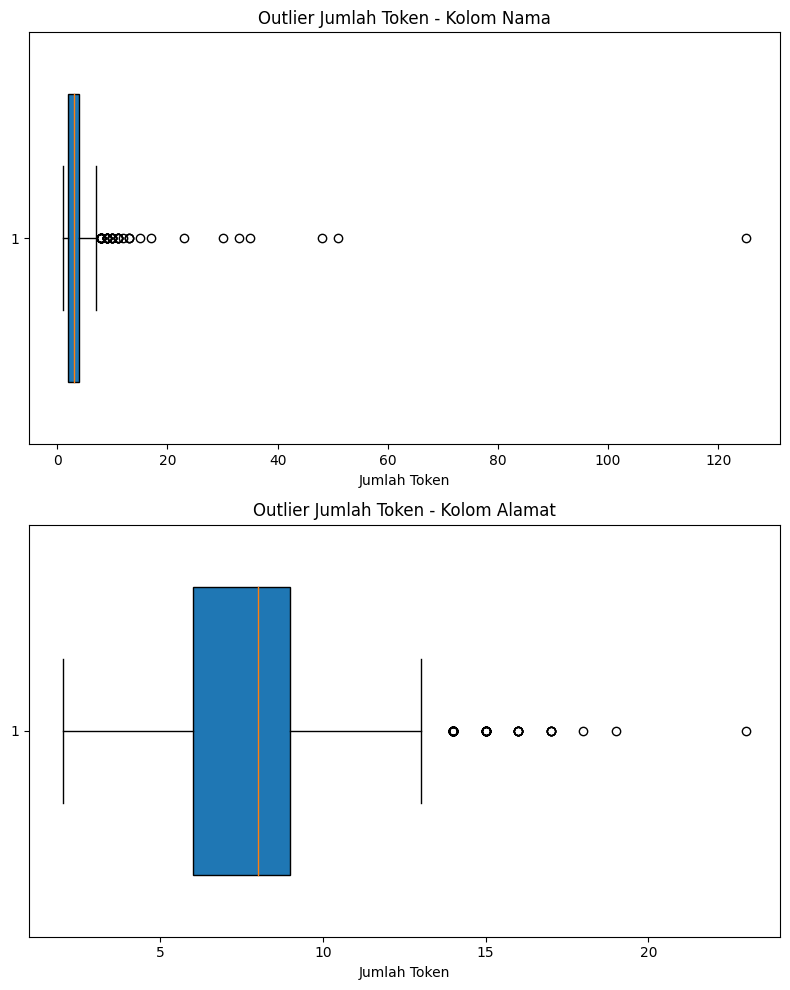

In [65]:
# Menghitung jumlah kata/token dari kolom nama
jumlah_token_nama = data_combined['nama'].apply(lambda x: len(x.split()))

# Menghitung jumlah kata/token dari kolom alamat
jumlah_token_alamat = data_combined['alamat'].apply(lambda x: len(x.split()))

# Membuat subplots untuk menampilkan grafik
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Menampilkan outlier jumlah token pada kolom nama
axes[0].boxplot(jumlah_token_nama, vert=False, widths=0.7, patch_artist=True)
axes[0].set_title('Outlier Jumlah Token - Kolom Nama')
axes[0].set_xlabel('Jumlah Token')

# Menampilkan outlier jumlah token pada kolom alamat
axes[1].boxplot(jumlah_token_alamat, vert=False, widths=0.7, patch_artist=True)
axes[1].set_title('Outlier Jumlah Token - Kolom Alamat')
axes[1].set_xlabel('Jumlah Token')

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [66]:
# Menghitung nilai IQR dan batas outlier untuk kolom nama
Q1_nama = np.percentile(jumlah_token_nama, 25)
Q3_nama = np.percentile(jumlah_token_nama, 75)
IQR_nama = Q3_nama - Q1_nama
lower_bound_nama = Q1_nama - (1.5 * IQR_nama)
upper_bound_nama = Q3_nama + (1.5 * IQR_nama)

# Menghitung jumlah outlier pada kolom nama
outliers_nama = jumlah_token_nama[(jumlah_token_nama < lower_bound_nama) | (jumlah_token_nama > upper_bound_nama)]
jumlah_outliers_nama = len(outliers_nama)

# Menghitung nilai IQR dan batas outlier untuk kolom alamat
Q1_alamat = np.percentile(jumlah_token_alamat, 25)
Q3_alamat = np.percentile(jumlah_token_alamat, 75)
IQR_alamat = Q3_alamat - Q1_alamat
lower_bound_alamat = Q1_alamat - (1.5 * IQR_alamat)
upper_bound_alamat = Q3_alamat + (1.5 * IQR_alamat)

# Menghitung jumlah outlier pada kolom alamat
outliers_alamat = jumlah_token_alamat[(jumlah_token_alamat < lower_bound_alamat) | (jumlah_token_alamat > upper_bound_alamat)]
jumlah_outliers_alamat = len(outliers_alamat)

# Menampilkan jumlah outlier untuk setiap kolom
print("Jumlah outlier pada kolom nama:", jumlah_outliers_nama)
print("Jumlah outlier pada kolom alamat:", jumlah_outliers_alamat)

Jumlah outlier pada kolom nama: 56
Jumlah outlier pada kolom alamat: 79


In [67]:
# Mendefinisikan fungsi untuk mengidentifikasi outlier menggunakan metode IQR
def find_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

# Mengidentifikasi outlier pada kolom "nama" dan "alamat"
outliers_nama = find_outliers_iqr(data_combined['nama'].apply(lambda x: len(x.split())))
outliers_alamat = find_outliers_iqr(data_combined['alamat'].apply(lambda x: len(x.split())))

# Menampilkan data yang termasuk outlier pada kolom "nama" dan "alamat"
outliers_data = data_combined[outliers_nama | outliers_alamat]

# Menampilkan semua data yang termasuk outlier
print("Data yang termasuk outlier:")
outliers_data

Data yang termasuk outlier:


,nama,alamat
3,pt satoria agro industri,satoria tower lantai 27 28 pradah jaya 1 01 de...
29,kuliner bu widi,griya kebraon utara ag 4 rt 05 rw 09 desa kebr...
32,satoria agro,satoria tower lantai 27 28 pradah jaya 1 1 des...
40,omah jeruk,kedurus sawah gede 44 rt 007 rw 002 kedurus ka...
49,putra abadi,gadel jaya timur cc 26 rt 012 rw 06 rt rw kara...
...,...,...
3220,brownies dan bolen afiyan cake and cookies sur...,tambak wedi baru vb 3 tambak wedi kenjeran 60126
3244,gosyen bakery almond crispy specialist,ruko tidar mas square a8 tidar 308 310 tembok ...
3255,surabaya patata oleh oleh surabaya cabang jl d...,dharmahusada 187 mojo gubeng 60285
3266,x o suki tp,level 5 06 08 tunjungan plaza 5 basuki rahmat ...


## Hapus Outlier dan Analisis

In [68]:
# Menghapus data outlier dari kolom nama
data_combined = data_combined[(jumlah_token_nama >= lower_bound_nama) & (jumlah_token_nama <= upper_bound_nama)]

# Menghapus data outlier dari kolom alamat
data_combined = data_combined[(jumlah_token_alamat >= lower_bound_alamat) & (jumlah_token_alamat <= upper_bound_alamat)]

# Menampilkan DataFrame setelah menghapus data outlier
data_combined

<ipython-input-68-94085792bf64>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_combined = data_combined[(jumlah_token_alamat >= lower_bound_alamat) & (jumlah_token_alamat <= upper_bound_alamat)]


,nama,alamat
0,cv boga jaya prima,penjaringan sari ps 2 d 9 penjaringan sari run...
1,cv mekar sekawan,darmo permai selatan 17 19 60226
2,d d,kedung anyar gang bei 10 rt 06 rw 13 sawahan s...
4,ak star asoka radja so sweet teratai,wonorejo permai selatan 1 cc 129 wonorejo rung...
5,makan kuy sub,gubeng kertajaya 11 d 8 airlangga gubeng 60286
...,...,...
3324,mixue gwalk,ruko taman gapura komp d 16 lakarsantri niaga ...
3325,mixue plaza surabaya,lt 4 plaza pemuda embong kaliasin genteng 60271
3326,mixue dharmawangsa,dharmawangsa 82a airlangga gubeng 60286
3327,mixue ice cream tea tidar,ruko tidar mas square a9


In [69]:
# Menghitung jumlah kata/token dari kolom nama
jumlah_token_nama = data_combined['nama'].apply(lambda x: len(x.split()))

# Menghitung jumlah kata/token dari kolom alamat
jumlah_token_alamat = data_combined['alamat'].apply(lambda x: len(x.split()))

# Membuat DataFrame hasil perhitungan
jumlah_token = pd.concat([jumlah_token_nama, jumlah_token_alamat], ignore_index=True)
jumlah_token

0        4
1        3
2        2
3        7
4        3
        ..
6385    12
6386     8
6387     5
6388     5
6389    10
Length: 6390, dtype: int64

In [70]:
jumlah_token.describe()

count    6390.000000
mean        5.292175
std         3.002360
min         1.000000
25%         2.250000
50%         5.000000
75%         8.000000
max        13.000000
dtype: float64

In [71]:
np.median(jumlah_token)

5.0

In [72]:
# Menghitung frekuensi kemunculan setiap jumlah token
token_counts = jumlah_token.value_counts()

# Membuat DataFrame hasil perhitungan
df_token_counts = pd.DataFrame({
    'Banyak Token': token_counts.index,
    'Frekuensi': token_counts.values
})

# Menampilkan DataFrame
df_token_counts

,Banyak Token,Frekuensi
0,2,1183
1,3,774
2,7,686
3,6,658
4,8,620
5,5,564
6,4,477
7,1,415
8,9,399
9,10,288


In [73]:
jumlah_token_nama.describe()

count    3195.000000
mean        2.820657
std         1.347815
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: nama, dtype: float64

In [74]:
np.median(jumlah_token_nama)

3.0

In [75]:
jumlah_token_alamat.describe()

count    3195.000000
mean        7.763693
std         1.998480
min         2.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        13.000000
Name: alamat, dtype: float64

In [76]:
np.median(jumlah_token_alamat)

8.0

In [77]:
data_combined

,nama,alamat
0,cv boga jaya prima,penjaringan sari ps 2 d 9 penjaringan sari run...
1,cv mekar sekawan,darmo permai selatan 17 19 60226
2,d d,kedung anyar gang bei 10 rt 06 rw 13 sawahan s...
4,ak star asoka radja so sweet teratai,wonorejo permai selatan 1 cc 129 wonorejo rung...
5,makan kuy sub,gubeng kertajaya 11 d 8 airlangga gubeng 60286
...,...,...
3324,mixue gwalk,ruko taman gapura komp d 16 lakarsantri niaga ...
3325,mixue plaza surabaya,lt 4 plaza pemuda embong kaliasin genteng 60271
3326,mixue dharmawangsa,dharmawangsa 82a airlangga gubeng 60286
3327,mixue ice cream tea tidar,ruko tidar mas square a9


In [78]:
data1_new = data_combined[:1379].copy()

# Menampilkan data1
print("Data1:")
data1_new

Data1:


,nama,alamat
0,cv boga jaya prima,penjaringan sari ps 2 d 9 penjaringan sari run...
1,cv mekar sekawan,darmo permai selatan 17 19 60226
2,d d,kedung anyar gang bei 10 rt 06 rw 13 sawahan s...
4,ak star asoka radja so sweet teratai,wonorejo permai selatan 1 cc 129 wonorejo rung...
5,makan kuy sub,gubeng kertajaya 11 d 8 airlangga gubeng 60286
...,...,...
1420,mixue ice cream tea bg junction,lantai ug upper ground c oc1 oc2 bubutan 1 7 b...
1421,mixue ice cream tea pakuwon mall,pakuwon trade centre lantai 1 fc 032a mayjend ...
1422,mixue ice cream tea siwalankerto,siwalankerto 8 aa4 60234
1423,mixue ice cream tea gayungsari 1215,gayungsari bar 10 41 gayungan gayungan 60235


In [79]:
data1_new['nama'] = data1_new['nama'].str.split(' ')
data1_new['alamat'] = data1_new['alamat'].str.split(' ')
# himp1 = data1['nama_alamat']
# himp1
# data1 = data1.drop(["nama", 'alamat'], axis=1)
data1_new

,nama,alamat
0,"[cv, boga, jaya, prima]","[penjaringan, sari, ps, 2, d, 9, penjaringan, ..."
1,"[cv, mekar, sekawan]","[darmo, permai, selatan, 17, 19, 60226]"
2,"[d, d]","[kedung, anyar, gang, bei, 10, rt, 06, rw, 13,..."
4,"[ak, star, asoka, radja, so, sweet, teratai]","[wonorejo, permai, selatan, 1, cc, 129, wonore..."
5,"[makan, kuy, sub]","[gubeng, kertajaya, 11, d, 8, airlangga, guben..."
...,...,...
1420,"[mixue, ice, cream, tea, bg, junction]","[lantai, ug, upper, ground, c, oc1, oc2, bubut..."
1421,"[mixue, ice, cream, tea, pakuwon, mall]","[pakuwon, trade, centre, lantai, 1, fc, 032a, ..."
1422,"[mixue, ice, cream, tea, siwalankerto]","[siwalankerto, 8, aa4, 60234]"
1423,"[mixue, ice, cream, tea, gayungsari, 1215]","[gayungsari, bar, 10, 41, gayungan, gayungan, ..."


In [80]:
data2_new = data_combined[1379:].copy()

# Menampilkan data2
print("Data2:")
data2_new

Data2:


,nama,alamat
1425,mie pedas ndoweer,urip sumoharjo 46 48 foodcourt urip simoharjo ...
1426,sentra wisata kuliner bratang binangun,raya manyar 80a baratajaya gubeng 60284
1427,warung aa 354,semampir tengah medokan semampir sukolilo 60119
1428,yoshinoya,plaza pemuda 33 37 embong kaliasin genteng 60271
1429,warung kongde mbak may,ppxp fhx bubutan 2 alun alun contong bubutan 6...
...,...,...
3324,mixue gwalk,ruko taman gapura komp d 16 lakarsantri niaga ...
3325,mixue plaza surabaya,lt 4 plaza pemuda embong kaliasin genteng 60271
3326,mixue dharmawangsa,dharmawangsa 82a airlangga gubeng 60286
3327,mixue ice cream tea tidar,ruko tidar mas square a9


In [81]:
data2_new['nama'] = data2_new['nama'].str.split(' ')
data2_new['alamat'] = data2_new['alamat'].str.split(' ')
# himp1 = data1['nama_alamat']
# himp1
# data1 = data1.drop(["nama", 'alamat'], axis=1)
data2_new

,nama,alamat
1425,"[mie, pedas, ndoweer]","[urip, sumoharjo, 46, 48, foodcourt, urip, sim..."
1426,"[sentra, wisata, kuliner, bratang, binangun]","[raya, manyar, 80a, baratajaya, gubeng, 60284]"
1427,"[warung, aa, 354]","[semampir, tengah, medokan, semampir, sukolilo..."
1428,[yoshinoya],"[plaza, pemuda, 33, 37, embong, kaliasin, gent..."
1429,"[warung, kongde, mbak, may]","[ppxp, fhx, bubutan, 2, alun, alun, contong, b..."
...,...,...
3324,"[mixue, gwalk]","[ruko, taman, gapura, komp, d, 16, lakarsantri..."
3325,"[mixue, plaza, surabaya]","[lt, 4, plaza, pemuda, embong, kaliasin, gente..."
3326,"[mixue, dharmawangsa]","[dharmawangsa, 82a, airlangga, gubeng, 60286]"
3327,"[mixue, ice, cream, tea, tidar]","[ruko, tidar, mas, square, a9]"


# Stopword Blocking

### Matching Stopword

In [82]:
# Define function to compute Jaccard Index between two series
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [83]:
matches = []

for i, bpjph in data1_new.iterrows():
    for j, gmaps in data2_new.iterrows():
        jaccard_nama = 0.5 * jaccard_similarity(bpjph['nama'], gmaps['nama'])
        jaccard_alamat = 0.5 * jaccard_similarity(bpjph['alamat'], gmaps['alamat'])
        jaccard_index = jaccard_nama + jaccard_alamat
        # if jaccard_index >= 0.7: # Set a threshold for a match
        matches.append((i, bpjph['nama'], bpjph['alamat'], j, gmaps['nama'], gmaps['alamat'], jaccard_index))
#             print("cocok")

# Create pandas DataFrame from matches
df_stopword = pd.DataFrame(matches, columns=['left_id', 'left_nama', 'left_alamat', 'right_id', 'right_nama', 'right_alamat', 'jaccard']).sort_values(['jaccard'], axis=0, ascending=False)

In [84]:
df_stopword

,left_id,left_nama,left_alamat,right_id,right_nama,right_alamat,jaccard
2480620,1411,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",3292,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",1.0
321329,186,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",3222,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",1.0
2476992,1409,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",3296,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",1.0
2460657,1399,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",3306,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",1.0
2091958,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.0
...,...,...,...,...,...,...,...
897706,514,"[dapur, vaw]","[dapur, vaw, dupak, baru, 25, jepara, bubutan]",2055,"[pusat, es, puter, pak, tohari]","[qq33, qgf, kapasari, pedukuhan, 12, tambakrej...",0.0
897705,514,"[dapur, vaw]","[dapur, vaw, dupak, baru, 25, jepara, bubutan]",2054,"[garasi, 21, coffee]","[ps, tunjungan, embong, malang, genteng, gente...",0.0
897704,514,"[dapur, vaw]","[dapur, vaw, dupak, baru, 25, jepara, bubutan]",2053,[kafeku],"[veteran, 2, krembangan, sel, krembangan, 60175]",0.0
897703,514,"[dapur, vaw]","[dapur, vaw, dupak, baru, 25, jepara, bubutan]",2052,"[aluama, coffee, bar]","[undaan, wetan, 30a, ketabang, genteng, 60272]",0.0


### Labeling Stopword

In [85]:
df_stopword_label = df_stopword.loc[df_stopword['jaccard'] > 0.0]

In [86]:
df_stopword_label

,left_id,left_nama,left_alamat,right_id,right_nama,right_alamat,jaccard
2480620,1411,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",3292,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",1.00
321329,186,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",3222,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",1.00
2476992,1409,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",3296,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",1.00
2460657,1399,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",3306,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",1.00
2091958,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.00
...,...,...,...,...,...,...,...
219515,129,"[anina, snack]","[pondok, benowo, indah, 1, 05, rt, 002, rw, 00...",3096,"[burger, king, basuki, rahmat]","[pert, darmo, park, 1, bl, 4, b, 3, 60256, emb...",0.02
218102,129,"[anina, snack]","[pondok, benowo, indah, 1, 05, rt, 002, rw, 00...",1617,"[jukuta, seafood]","[abdul, wahab, siamin, ruko, villa, bukit, mas...",0.02
2387620,1359,"[burger, king, basuki, rahmat, surabaya]","[pert, darmo, park, 1, bl, 4, b, 3, 60256, emb...",2880,"[nasi, bali, pengampon]","[kalianyar, kulon, 2, 1, rt, 002, rw, 07, bong...",0.02
218397,129,"[anina, snack]","[pondok, benowo, indah, 1, 05, rt, 002, rw, 00...",1928,"[bintang, catering, wedding, function]","[komplek, pakde, wage, indah, 2, yos, sudarso,...",0.02


In [87]:
df_stopword_label.iloc[300:350]

,left_id,left_nama,left_alamat,right_id,right_nama,right_alamat,jaccard
2422319,1378,"[mixue, ice, cream, tea, merr]","[dr, ir, h, soekarno, 416, a, kedung, baruk, r...",3092,"[burger, king, merr]","[mqmj, 4gv, dr, ir, h, soekarno, kedung, baruk...",0.404762
2414922,1374,"[gokana, ramen, teppan, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2947,"[rotiboy, plaza, surabaya]","[plaza, 31, lt, 1, 24a, pemuda, 33, 37, embong...",0.404762
2426047,1380,"[mixue, ice, cream, tea, dharmawangsa]","[dharmawangsa, 82a, airlangga, gubeng, 60286]",3194,"[ayam, nelongso, dharmawangsa]","[dharmawangsa, 94, airlangga, gubeng, 60286]",0.404762
2429772,1382,"[mixue, ice, cream, tea, gwalk]","[ruko, taman, gapura, komp, d, 16, lakarsantri...",3292,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",0.404762
1309513,748,"[kreasi, food]","[ruko, taman, internasional, citraland, c8, sa...",1612,"[hongdae, korean, food, restaurant, surabaya, ...","[ruko, taman, internasional, citraland, a20, s...",0.404762
2462790,1401,"[mixue, ice, cream, tea, manyar, kertoarjo]","[manyar, kertoarjo, 5, 57, mojo, gubeng, 60285]",1735,"[layar, seafood, manyar, kertoarjo]","[manyar, kertoarjo, 23, 25, mojo, gubeng, 60285]",0.402778
2489546,1416,"[mixue, ice, cream, tea, wiyung]","[raya, wiyung, babatan, wiyung, 60227]",3130,"[pizza, hut, restoran]","[raya, menganti, babatan, wiyung, 60227]",0.400000
2418130,1376,"[gokana, ramen, teppan, tunjungan, plasa, 6]","[embong, malang, genteng, genteng, 60261]",2499,"[warung, akamsi, surabaya]","[embong, malang, 76, genteng, genteng, 60261]",0.400000
2380318,1355,"[a, w, plaza, surabaya]","[plaza, lantai, 2, pemuda, 33, 37, embong, kal...",2842,"[puri, iwake]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.400000
2435217,1385,"[mixue, ice, cream, kapas, krampung]","[kapas, krampung, 97b, rangkah, tambaksari, 60...",3289,"[mixue, ice, cream]","[kapas, gading, madya, 1, gading, tambaksari, ...",0.400000


In [88]:
df_stopword_label.loc[704885]["right_alamat"]

['dr', 'ir', 'h', 'soekarno', '199', 'kalijudan', 'mulyorejo', '60114']

In [89]:
df_stopword_label['label'] = 0
df_stopword_label.loc[:1109488, 'label'] = 1
df_stopword_label.loc[110718, 'label'] = 1
df_stopword_label.loc[2371264:2429803, 'label'] = 1
df_stopword_label.loc[328580, 'label'] = 1
df_stopword_label.loc[551962:2418535, 'label'] = 1
df_stopword_label.loc[2373731:2420346, 'label'] = 1
df_stopword_label.loc[521074:2471547, 'label'] = 1
df_stopword_label.loc[1385483:1223894, 'label'] = 1
df_stopword_label.loc[1042297, 'label'] = 1
df_stopword_label.loc[2175497, 'label'] = 1
df_stopword_label.loc[2396735:955132, 'label'] = 1
df_stopword_label.loc[1621588, 'label'] = 1
df_stopword_label.loc[2090141, 'label'] = 1
df_stopword_label.loc[1147623, 'label'] = 1
df_stopword_label.loc[1356457, 'label'] = 1
df_stopword_label.loc[2104671, 'label'] = 1
df_stopword_label.loc[119797, 'label'] = 1
df_stopword_label.loc[762639, 'label'] = 1
df_stopword_label.loc[671841, 'label'] = 1
df_stopword_label.loc[1267477, 'label'] = 1
df_stopword_label.loc[717240, 'label'] = 1
df_stopword_label.loc[1271108, 'label'] = 1
df_stopword_label.loc[946053, 'label'] = 1

<ipython-input-89-7cc0ac6f282d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stopword_label['label'] = 0


In [90]:
# indices_to_remove = [330396]
# indices_to_remove = [1358273]
# indices_to_remove = [704549]
# indices_to_remove = [762639]
# # remove the rows with the specified indices
# df_stopword_label = df_stopword_label.drop(index=indices_to_remove)

In [91]:
# TOTAL PASANGAN DATA YANG BENERAN SCOCOK DARI STOPWORD BLOCKING
counts = df_stopword_label['label'].value_counts()
counts[1]

155

In [92]:
df_stopword_label.loc[df_stopword_label['label'] == 1].sort_values(['jaccard'], axis=0, ascending=False).iloc[100:155]

,left_id,left_nama,left_alamat,right_id,right_nama,right_alamat,jaccard,label
2491508,1417,"[mixue, ice, cream, tea, kalijudan]","[kalijudan, 42, rw, 02, kalijudan, mulyorejo, ...",3284,"[mixue, kalijudan]","[kalijudan, 42, rw, 02, kalijudan, mulyorejo, ...",0.700000,1
2478805,1410,"[mixue, ice, cream, tea, jemursari]","[raya, jemursari, 329, prapen, tenggilis, mejo...",3293,"[mixue, jemursari]","[raya, jemursari, 329, prapen, tenggilis, mejo...",0.700000,1
2473362,1407,"[mixue, ice, cream, tea, margorejo]","[margorejo, indah, 8, jemur, wonosari, wonocol...",3298,"[mixue, margorejo]","[margorejo, indah, 8, jemur, wonosari, wonocol...",0.700000,1
2487878,1415,"[mixue, ice, cream, tea, kapasan]","[kapasan, 210b, sidodadi, simokerto, 60141]",3286,"[mixue, kapasan]","[kapasan, 210b, sidodadi, simokerto, 60141]",0.700000,1
2426173,1380,"[mixue, ice, cream, tea, dharmawangsa]","[dharmawangsa, 82a, airlangga, gubeng, 60286]",3326,"[mixue, dharmawangsa]","[dharmawangsa, 82a, airlangga, gubeng, 60286]",0.700000,1
1111268,633,"[js, pizza]","[genteng, sidomulyo, 11, rt, 3, rw, 6, genteng...",3199,"[js, pizza]","[genteng, sidomulyo, 11, genteng, genteng, 60275]",0.687500,1
2186394,1240,"[wong, jowo]","[prima, kebraon, 5, 24, kebraon, karangpilang]",3257,"[wong, jowo, minuman, herbal]","[prima, kebraon, 5, 24, kebraon, karangpilang,...",0.666667,1
212365,125,"[ananda, lapis, dan, bolu, gulung, surabaya]","[jetis, kulon, 6, 27, wonokromo, wonokromo]",3217,"[bolu, gulung, surabaya]","[jetis, kulon, 6, 27, wonokromo, wonokromo, 60...",0.666667,1
2369484,1349,"[solaria, plaza, surabaya]","[plaza, solaria, delta, pemuda, embong, kalias...",2904,[solaria],"[plaza, solaria, delta, pemuda, embong, kalias...",0.666667,1
2360664,1344,"[ayam, nelongso, wiyung]","[raya, wiyung, ruko, babatan, pratama, a2, bab...",3186,"[nelongso, fried, chicken, wiyung, branch]","[raya, wiyung, ruko, babatan, pratama, a2, bab...",0.666667,1


# Prefix Blocking

## Match Berdasarkan Kolom Nama (FIX)

### Match Berdasarkan Kolom Nama


In [104]:
prefix_nama_length = 3

In [105]:
# Create blocks using prefix filtering based on 'nama' column
blocks = {}
for index, row in data2_new.iterrows():
    nama_list = row['nama']
    alamat_list = row['alamat']
    nama_prefix = tuple(nama_list[:prefix_nama_length])
    if nama_prefix not in blocks:
        blocks[nama_prefix] = []
    blocks[nama_prefix].append((index, nama_list, alamat_list))

# Perform string matching using Jaccard similarity based on 'nama' and 'alamat' columns
matches = []
matched_indices = set()

for index1, row1 in data1_new.iterrows():
    nama_list = row1['nama']
    alamat_list = row1['alamat']
    tokens1_nama = set(nama_list)
    tokens1_alamat = set(alamat_list)

    nama_prefix = tuple(nama_list[:prefix_nama_length])
    if nama_prefix in blocks:
        for index2, nama2_list, alamat2_list in blocks[nama_prefix]:
            tokens2_nama = set(nama2_list)
            tokens2_alamat = set(alamat2_list)

            jaccard_sim_nama = len(tokens1_nama.intersection(tokens2_nama)) / len(tokens1_nama.union(tokens2_nama))
            jaccard_sim_alamat = len(tokens1_alamat.intersection(tokens2_alamat)) / len(tokens1_alamat.union(tokens2_alamat))
            jaccard_sim = (jaccard_sim_nama + jaccard_sim_alamat) / 2

            if (index1, index2) not in matched_indices:
                matched_indices.add((index1, index2))
                matches.append((index1, nama_list, alamat_list, index2, nama2_list, alamat2_list, jaccard_sim))

In [106]:
# convert list of matches to dataframe
df_prefix_nama = pd.DataFrame(matches, columns=['left_index', 'left_nama', 'left_alamat', 'right_index', 'right_nama', 'right_alamat', 'jaccard']).sort_values(['jaccard'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='first', ignore_index=False, key=None)

In [107]:
df_prefix_nama

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard
35,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.000000
677,1399,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",3306,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",1.000000
37,1248,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",3069,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",1.000000
432,1390,"[mixue, ice, cream, tea, semolowaru]","[nginden, semolo, 20, nginden, jangkungan, suk...",3316,"[mixue, ice, cream, tea, semolowaru]","[nginden, semolo, 20, nginden, jangkungan, suk...",1.000000
39,1249,"[kopi, kenangan, royal, plaza, surabaya]","[royal, plaza, lg, ahmad, yani, 16, 18, wonokr...",3074,"[kopi, kenangan, royal, plaza, surabaya]","[royal, plaza, lg, ahmad, yani, 16, 18, wonokr...",1.000000
...,...,...,...,...,...,...,...
271,1385,"[mixue, ice, cream, kapas, krampung]","[kapas, krampung, 97b, rangkah, tambaksari, 60...",3277,"[mixue, ice, cream, tea, pakuwon, mall]","[pakuwon, trade, centre, lantai, 1, fc, 032a, ...",0.187500
296,1385,"[mixue, ice, cream, kapas, krampung]","[kapas, krampung, 97b, rangkah, tambaksari, 60...",3323,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",0.187500
293,1385,"[mixue, ice, cream, kapas, krampung]","[kapas, krampung, 97b, rangkah, tambaksari, 60...",3317,"[mixue, ice, cream, tea, royal, plaza]","[ahmad, yani, 16, 18, wonokromo, wonokromo, 60...",0.187500
282,1385,"[mixue, ice, cream, kapas, krampung]","[kapas, krampung, 97b, rangkah, tambaksari, 60...",3302,"[mixue, ice, cream, tea, raya, dukuh, kupang]","[raya, dukuh, kupang, 47a, putat, jaya, sawaha...",0.166667


In [108]:
def find_duplicate_rows(df, columns):
    # Cari baris duplikat berdasarkan kolom yang ditentukan
    duplicate_rows = df[df.duplicated(subset=columns, keep='first')]

    return duplicate_rows

def remove_duplicate_rows(df, columns):
    # Cari baris duplikat
    duplicate_rows = find_duplicate_rows(df, columns)

    # Buat mask untuk menandai baris-baris yang duplikat
    mask = df.isin(duplicate_rows)

    # Hapus baris-baris yang duplikat
    df_no_duplicates = df[~mask.all(axis=1)]

    return df_no_duplicates

df_prefix_nama_dup = find_duplicate_rows(df_prefix_nama, ['left_index', 'right_index'])
df_prefix_nama_dup

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard


### Labeling Prefix (Kolom Nama)

In [109]:
df_prefix_nama_label = df_prefix_nama

In [110]:
df_prefix_nama_label.iloc[50:100]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard
1112,1416,"[mixue, ice, cream, tea, wiyung]","[raya, wiyung, babatan, wiyung, 60227]",3285,"[mixue, ice, cream, tea, wiyung]","[mmqj, qvq, raya, wiyung, babatan, wiyung, 60227]",0.833333
15,325,"[aisya, catering, wedding]","[kebonsari, 3, 28, kebonsari, jambangan, 60233]",1856,"[aisya, catering, wedding]","[dan, kebonsari, 3, 28, raya, kebonsari, 18, k...",0.812500
53,1369,"[roti, o, dtc, surabaya]","[darmo, trade, center, jagir, wonokromo, jagir...",2956,"[roti, o, dtc, wonokromo]","[darmo, trade, center, jagir, wonokromo, jagir...",0.800000
31,993,"[pangsit, mie, ayam, kak, rus]","[perumahan, gunung, sari, indah, ww, 21, 60223]",3228,"[pangsit, mie, ayam, kak, rus]","[ww, perumahan, gn, sari, indah, 21, kedurus, ...",0.800000
12,291,"[carpentier, kitchen]","[untung, suropati, 83, dr, soetomo, tegalsari]",1634,"[carpentier, kitchen]","[untung, suropati, 83, tegalsari, 60264]",0.785714
20,538,"[guri, ramen, mulyosari]","[mulyosari, 92, kalisari, mulyorejo, nan]",3243,"[guri, ramen, mulyosari]","[raya, mulyosari, 92, kalisari, mulyorejo, 60112]",0.785714
5,161,[aykitchen],"[wonorejo, selatan, 4, 122, wonorejo, rungkut]",3210,[aykitchen],"[wonorejo, sel, 4, 122, wonorejo, rungkut, 60296]",0.785714
61,1374,"[gokana, ramen, teppan, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2926,"[gokana, ramen, teppan, plaza, surabaya]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.777778
16,349,"[dapur, flamboyan]","[bendul, merisi, gg, 1, sel, 23, rt, rw, bendu...",3204,"[dapur, flamboyan]","[bendul, merisi, gg, 1, selatan, 23, bendul, m...",0.772727
2,102,"[ayam, guling, lambeh]","[griya, babatan, mukti, m, 23, babatan, wiyung...",3265,"[ayam, guling, lambeh]","[griya, babatan, 2, m, 23, rt, 003, rw, 07, ba...",0.750000


In [111]:
df_prefix_nama_label['label'] = 0
df_prefix_nama_label.loc[:25, 'label'] = 1

In [112]:
# # indices_to_remove = [8]
# indices_to_remove = [18]
# # remove the rows with the specified indices
# df_prefix_2_label = df_prefix_2_label.drop(index=indices_to_remove)

In [113]:
# TOTAL PASANGAN DATA YANG BENERAN SCOCOK DARI STOPWORD BLOCKING
counts = df_prefix_nama_label['label'].value_counts()
counts[1]

81

In [114]:
df_prefix_nama_label.loc[df_prefix_nama_label['label'] == 1].sort_values(['jaccard'], axis=0, ascending=False).iloc[:50]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
35,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.000000,1
240,1383,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",3323,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",1.000000,1
6,186,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",3222,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",1.000000,1
1003,1412,"[mixue, ice, cream, tea, darmo, indah]","[darmo, indah, timur, eu, 7, tandes, 60187]",3291,"[mixue, ice, cream, tea, darmo, indah]","[darmo, indah, timur, eu, 7, tandes, 60187]",1.000000,1
18,398,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",3222,"[bandeng, juwana]","[ngagel, jaya, utara, 103, 1, baratajaya, gube...",1.000000,1
9,203,"[bellin, bakery]","[sidosermo, airdas, a, 12, sidosermo, wonocolo...",3263,"[bellin, bakery]","[sidosermo, airdas, a, 12, sidosermo, wonocolo...",1.000000,1
976,1411,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",3292,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",1.000000,1
22,556,[ichirank],"[rungkut, asri, barat, 13, 24, rungkut, kidul,...",3240,[ichirank],"[rungkut, asri, barat, 13, 24, rungkut, kidul,...",1.000000,1
323,1386,"[mixue, ice, cream, tea, karang, menjangan]","[karang, menjangan, 117c, mojo, gubeng, 60286]",3320,"[mixue, ice, cream, tea, karang, menjangan]","[karang, menjangan, 117c, mojo, gubeng, 60286]",1.000000,1
923,1409,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",3296,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",1.000000,1


In [115]:
df_prefix_nama.loc[13]["right_alamat"]

['mayjen', 'hr', 'muhammad', '73b', 'putat', 'gede', 'sukomanunggal', '60189']

## Match Berdasarkan Kolom Alamat (FIX)

### Match Berdasarkan Kolom Alamat

In [116]:
prefix_alamat_length = 8

In [117]:
# Create blocks using prefix filtering based on 'alamat' column
blocks = {}
for index, row in data2_new.iterrows():
    nama_list = row['nama']
    alamat_list = row['alamat']
    alamat_prefix = tuple(alamat_list[:prefix_alamat_length])
    if alamat_prefix not in blocks:
        blocks[alamat_prefix] = []
    blocks[alamat_prefix].append((index, nama_list, alamat_list))

# Perform string matching using Jaccard similarity based on 'nama' and 'alamat' columns
matches = []
matched_indices = set()

for index1, row1 in data1_new.iterrows():
    nama_list = row1['nama']
    alamat_list = row1['alamat']
    tokens1_nama = set(nama_list)
    tokens1_alamat = set(alamat_list)

    alamat_prefix = tuple(alamat_list[:prefix_alamat_length])
    if alamat_prefix in blocks:
        for index2, nama2_list, alamat2_list in blocks[alamat_prefix]:
            tokens2_nama = set(nama2_list)
            tokens2_alamat = set(alamat2_list)

            jaccard_sim_nama = len(tokens1_nama.intersection(tokens2_nama)) / len(tokens1_nama.union(tokens2_nama))
            jaccard_sim_alamat = len(tokens1_alamat.intersection(tokens2_alamat)) / len(tokens1_alamat.union(tokens2_alamat))
            jaccard_sim = (jaccard_sim_nama + jaccard_sim_alamat) / 2

            if (index1, index2) not in matched_indices:
                matched_indices.add((index1, index2))
                matches.append((index1, nama_list, alamat_list, index2, nama2_list, alamat2_list, jaccard_sim))

In [118]:
# convert list of matches to dataframe
df_prefix_alamat = pd.DataFrame(matches, columns=['left_index', 'left_nama', 'left_alamat', 'right_index', 'right_nama', 'right_alamat', 'jaccard']).sort_values(['jaccard'], axis=0, ascending=False)

In [119]:
df_prefix_alamat

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard
82,1397,"[mixue, ice, cream, tea, tambaksari]","[pacar, keling, 7, pacar, keling, tambaksari, ...",3308,"[mixue, ice, cream, tea, tambaksari]","[pacar, keling, 7, pacar, keling, tambaksari, ...",1.000000
74,1389,"[mixue, ice, cream, tea, royal, plaza]","[ahmad, yani, 16, 18, wonokromo, wonokromo, 60...",3317,"[mixue, ice, cream, tea, royal, plaza]","[ahmad, yani, 16, 18, wonokromo, wonokromo, 60...",1.000000
20,1341,"[ayam, nelongso, dharmawangsa]","[dharmawangsa, 94, airlangga, gubeng, 60286]",3194,"[ayam, nelongso, dharmawangsa]","[dharmawangsa, 94, airlangga, gubeng, 60286]",1.000000
81,1396,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",3309,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",1.000000
79,1394,"[mixue, ice, cream, tea, dharmahusada]","[dharmahusada, 121, c, mojo, gubeng, 60285]",3312,"[mixue, ice, cream, tea, dharmahusada]","[dharmahusada, 121, c, mojo, gubeng, 60285]",1.000000
...,...,...,...,...,...,...,...
58,1374,"[gokana, ramen, teppan, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",1428,[yoshinoya],"[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.500000
32,1353,"[yoshinoya, plaza, surabaya]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2086,"[kopi, tengah, kota]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.500000
60,1374,"[gokana, ramen, teppan, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2086,"[kopi, tengah, kota]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.500000
39,1354,"[pizza, hut, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",3098,"[burger, king]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.500000


In [120]:
def find_duplicate_rows(df, columns):
    # Cari baris duplikat berdasarkan kolom yang ditentukan
    duplicate_rows = df[df.duplicated(subset=columns, keep='first')]

    return duplicate_rows

def remove_duplicate_rows(df, columns):
    # Cari baris duplikat
    duplicate_rows = find_duplicate_rows(df, columns)

    # Buat mask untuk menandai baris-baris yang duplikat
    mask = df.isin(duplicate_rows)

    # Hapus baris-baris yang duplikat
    df_no_duplicates = df[~mask.all(axis=1)]

    return df_no_duplicates

df_prefix_alamat_dup = find_duplicate_rows(df_prefix_alamat, ['left_index', 'right_index'])
df_prefix_alamat_dup

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard


### Labeling Prefix (Kolom Alamat)

In [121]:
df_prefix_alamat_label = df_prefix_alamat

In [122]:
df_prefix_alamat_label.iloc[100:150]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard
32,1353,"[yoshinoya, plaza, surabaya]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2086,"[kopi, tengah, kota]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.500000
60,1374,"[gokana, ramen, teppan, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2086,"[kopi, tengah, kota]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.500000
39,1354,"[pizza, hut, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",3098,"[burger, king]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.500000
41,1357,"[bakso, boedjangan, dharma, husada, surabaya]","[raya, dharma, husada, indah, 4, a, 8, mojo, g...",2342,"[borre, cafe]","[raya, dharma, husada, indah, 4, a, 8, mojo, g...",0.409091


In [123]:
df_prefix_alamat_label.loc[38]["right_alamat"]

['plaza', 'pemuda', '33', '37', 'embong', 'kaliasin', 'genteng', '60271']

In [124]:
df_prefix_alamat_label['label'] = 0
df_prefix_alamat_label.loc[:48, 'label'] = 1
df_prefix_alamat_label.loc[27:68, 'label'] = 1
df_prefix_alamat_label.loc[54:64, 'label'] = 1
df_prefix_alamat_label.loc[47, 'label'] = 1

In [125]:
# TOTAL PASANGAN DATA YANG BENERAN SCOCOK DARI STOPWORD BLOCKING
counts = df_prefix_alamat_label['label'].value_counts()
counts[1]

87

In [126]:
df_prefix_alamat_label.loc[df_prefix_alamat_label['label'] == 1].sort_values(['jaccard'], axis=0, ascending=False).iloc[50:100]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
50,1366,"[richeese, factory, ahmad, yani]","[ahmad, yani, 288, dukuh, menanggal, gayungan,...",2986,"[richeese, factory]","[ahmad, yani, 288, dukuh, menanggal, gayungan,...",0.750000,1
19,1297,"[urban, wagyu]","[opak, 50, darmo, wonokromo, 60241]",3261,"[urban, wagyu, steakhouse, opak]","[opak, 50, darmo, wonokromo, 60241]",0.750000,1
73,1388,"[mixue, ice, cream, tea, ptc, surabaya]","[puncak, indah, raya, lontar, 2, babatan, wiyu...",3318,"[mixue, ptc, surabaya]","[puncak, indah, raya, lontar, 2, babatan, wiyu...",0.750000,1
18,1293,[ummaria],"[kebonsari, 2, 12, kebonsari, jambangan, 60233]",3260,"[kebab, ummaria]","[kebonsari, 2, 12, kebonsari, jambangan, 60233]",0.750000,1
55,1371,"[roti, o, kazacity, surabaya]","[kaza, city, kapas, krampung, tambakrejo, simo...",2950,"[roti, o]","[kaza, city, kapas, krampung, tambakrejo, simo...",0.750000,1
56,1372,"[wendy, s, grand, city]","[grand, city, mall, walikota, mustajab, ketaba...",2931,"[wendy, s]","[grand, city, mall, walikota, mustajab, ketaba...",0.750000,1
67,1381,"[mixue, ice, cream, tea, plaza, surabaya]","[lt, 4, plaza, pemuda, embong, kaliasin, gente...",3325,"[mixue, plaza, surabaya]","[lt, 4, plaza, pemuda, embong, kaliasin, gente...",0.750000,1
14,1251,"[starbucks, coffee, jemursari, surabaya]","[jemursari, tim, 2, jemur, wonosari, wonocolo,...",2972,"[starbucks, jemursari]","[jemursari, tim, 2, jemur, wonosari, wonocolo,...",0.750000,1
98,1418,"[mixue, ice, cream, tea, darmo, permai]","[raya, darmo, permai, 1, 57a, pradahkalikendal...",3272,"[mixue, damai, darmo, permai]","[raya, darmo, permai, 1, 57a, pradahkalikendal...",0.714286,1
16,1253,"[outlet, es, teler, 77, royal, plaza, surabaya]","[royal, plaza, ahmad, yani, 16, 18, wonokromo,...",2933,"[es, teler, 77]","[royal, plaza, ahmad, yani, 16, 18, wonokromo,...",0.714286,1


In [127]:
df_prefix_alamat.loc[15]["left_alamat"]

['raya', 'gubeng', '33', 'rt', '002', 'rw', '06', 'gubeng', 'gubeng', '60281']

# Size Blocking

## Match Berdasarkan Kolom Nama (FIX)

### Match Berdasarkan Kolom Nama

In [ ]:
size_range_nama = 1

In [ ]:
# Create blocks using size filtering
blocks = {}
for index, row in data2_new.iterrows():
    nama_list = row['nama']
    alamat_list = row['alamat']
    nama_size = len(nama_list)
    if nama_size not in blocks:
        blocks[nama_size] = []
    blocks[nama_size].append((index, nama_list, alamat_list))

matches = []
matched_indices = set()

for index1, row1 in data1_new.iterrows():
    nama_list = row1['nama']
    alamat_list = row1['alamat']
    tokens1_nama = set(nama_list)
    tokens1_alamat = set(alamat_list)

    for i in range(len(nama_list) - size_range_nama, len(nama_list) + size_range_nama + 1):
        if i in blocks:
            for index2, nama2_list, alamat2_list in blocks[i]:
                tokens2_nama = set(nama2_list)
                tokens2_alamat = set(alamat2_list)

                jaccard_sim_nama = len(tokens1_nama.intersection(tokens2_nama)) / len(tokens1_nama.union(tokens2_nama))
                jaccard_sim_alamat = len(tokens1_alamat.intersection(tokens2_alamat)) / len(tokens1_alamat.union(tokens2_alamat))
                jaccard_sim = (jaccard_sim_nama + jaccard_sim_alamat) / 2

                if (index1, index2) not in matched_indices:
                    matched_indices.add((index1, index2))
                    matches.append((index1, nama_list, alamat_list, index2, nama2_list, alamat2_list, jaccard_sim))

In [ ]:
# convert list of matches to dataframe
df_size_nama = pd.DataFrame(matches, columns=['left_index', 'left_nama', 'left_alamat', 'right_index', 'right_nama', 'right_alamat', 'jaccard']).sort_values(['jaccard'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='first', ignore_index=False, key=None)

In [ ]:
df_size_nama

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard
1427262,1396,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",3309,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",1.0
1434020,1411,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",3292,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",1.0
1310246,1264,"[teman, ngupi, store]","[jemur, wonosari, gg, modin, 10d, jemur, wonos...",3258,"[teman, ngupi, store]","[gg, modin, 10d, jemur, wonosari, wonocolo, 60...",1.0
1398844,1358,"[bakso, boedjangan, manyar, surabaya]","[raya, manyar, 85, menur, pumpungan, sukolilo,...",3099,"[bakso, boedjangan, manyar, surabaya]","[raya, manyar, 85, menur, pumpungan, sukolilo,...",1.0
1237093,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.0
...,...,...,...,...,...,...,...
516892,499,[chemilenial],"[mrutu, kalianyar, 1, 36, wonokusumo, semampir...",2314,"[do, cafe]","[lidah, wetan, lakarsantri, city, 60213]",0.0
516891,499,[chemilenial],"[mrutu, kalianyar, 1, 36, wonokusumo, semampir...",2312,"[cafe, in]","[kuwukan, 4, 18, lontar, sambikerep, 60216]",0.0
516890,499,[chemilenial],"[mrutu, kalianyar, 1, 36, wonokusumo, semampir...",2309,"[md, cafã]","[raya, sambikerep, 68, sambikerep, sambikerep,...",0.0
516889,499,[chemilenial],"[mrutu, kalianyar, 1, 36, wonokusumo, semampir...",2300,"[baccani, cafe]","[raya, wiyung, 20, kedurus, karangpilang, 60223]",0.0


### Labeling Size (Kolom Nama)

In [ ]:
df_size_nama_label = df_size_nama.loc[df_size_nama['jaccard'] > 0.0]

In [ ]:
df_size_nama_label

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard
1427262,1396,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",3309,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",1.00
1434020,1411,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",3292,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",1.00
1310246,1264,"[teman, ngupi, store]","[jemur, wonosari, gg, modin, 10d, jemur, wonos...",3258,"[teman, ngupi, store]","[gg, modin, 10d, jemur, wonosari, wonocolo, 60...",1.00
1398844,1358,"[bakso, boedjangan, manyar, surabaya]","[raya, manyar, 85, menur, pumpungan, sukolilo,...",3099,"[bakso, boedjangan, manyar, surabaya]","[raya, manyar, 85, menur, pumpungan, sukolilo,...",1.00
1237093,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.00
...,...,...,...,...,...,...,...
130645,129,"[anina, snack]","[pondok, benowo, indah, 1, 05, rt, 002, rw, 00...",2962,[starbucks],"[boulevard, famili, selatan, kav, 1, ground, f...",0.02
837021,805,"[maju, raja]","[simo, kwagean, kuburan, 1, 1a, rt, 004, rw, 0...",2962,[starbucks],"[boulevard, famili, selatan, kav, 1, ground, f...",0.02
837037,805,"[maju, raja]","[simo, kwagean, kuburan, 1, 1a, rt, 004, rw, 0...",3090,[cfc],"[wtc, kios, galery, lt, 1, 705, pemuda, 27, 31...",0.02
130661,129,"[anina, snack]","[pondok, benowo, indah, 1, 05, rt, 002, rw, 00...",3090,[cfc],"[wtc, kios, galery, lt, 1, 705, pemuda, 27, 31...",0.02


In [ ]:
df_size_nama_label.iloc[50:100]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
1058075,1018,"[pizza, haq]","[kendangsari, b, 10, kendangsari, tenggilis, m...",3117,"[pizza, haq]","[kendangsari, ykp, b, 10, kendangsari, tenggil...",0.857143,1
1302228,1252,"[starbucks, coffee, gubeng]","[raya, gubeng, 33, rt, 002, rw, 06, gubeng, gu...",2983,"[starbucks, gubeng]","[raya, gubeng, 33, rt, 002, rw, 06, gubeng, gu...",0.833333,1
971932,937,[ngastina],"[bawean, 20, ngagel, wonokromo, 60275]",3224,[ngastina],"[bawean, 20, ngagel, wonokromo, 60246]",0.833333,1
1436147,1416,"[mixue, ice, cream, tea, wiyung]","[raya, wiyung, babatan, wiyung, 60227]",3285,"[mixue, ice, cream, tea, wiyung]","[mmqj, qvq, raya, wiyung, babatan, wiyung, 60227]",0.833333,1
423923,403,"[dimsum, mbledos]","[dr, ir, h, soekarno, 53, kalijudan, mulyorejo...",3269,"[dimsum, mbledos, merr]","[dr, ir, h, soekarno, 53, kalijudan, mulyorejo...",0.833333,1
331745,325,"[aisya, catering, wedding]","[kebonsari, 3, 28, kebonsari, jambangan, 60233]",1856,"[aisya, catering, wedding]","[dan, kebonsari, 3, 28, raya, kebonsari, 18, k...",0.812500,1
150023,148,"[astin, brownies, cookies]","[ngaglik, baru, 3, 23, kapasari, genteng]",3212,"[dapur, astin, brownies, cookies]","[ngaglik, baru, 3, 23, kapasari, genteng, 60273]",0.803571,1
1411704,1369,"[roti, o, dtc, surabaya]","[darmo, trade, center, jagir, wonokromo, jagir...",2956,"[roti, o, dtc, wonokromo]","[darmo, trade, center, jagir, wonokromo, jagir...",0.800000,1
1030495,993,"[pangsit, mie, ayam, kak, rus]","[perumahan, gunung, sari, indah, ww, 21, 60223]",3228,"[pangsit, mie, ayam, kak, rus]","[ww, perumahan, gn, sari, indah, 21, kedurus, ...",0.800000,1
296916,291,"[carpentier, kitchen]","[untung, suropati, 83, dr, soetomo, tegalsari]",1634,"[carpentier, kitchen]","[untung, suropati, 83, tegalsari, 60264]",0.785714,1


In [ ]:
df_size_nama_label['label'] = 0
df_size_nama_label.loc[:658473, 'label'] = 1
df_size_nama_label.loc[195820:233400, 'label'] = 1
df_size_nama_label.loc[81120:1244128, 'label'] = 1
df_size_nama_label.loc[721924, 'label'] = 1
df_size_nama_label.loc[565987, 'label'] = 1
df_size_nama_label.loc[957036, 'label'] = 1
df_size_nama_label.loc[428703, 'label'] = 1
df_size_nama_label.loc[560849, 'label'] = 1

<ipython-input-216-ab94226f8d07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size_nama_label['label'] = 0


In [ ]:
# # indices_to_remove = [195820]
# indices_to_remove = [418822]
# # remove the rows with the specified indices
# df_size_2_label = df_size_2_label.drop(index=indices_to_remove)

In [ ]:
# TOTAL PASANGAN DATA YANG BENERAN SCOCOK DARI STOPWORD BLOCKING
counts = df_size_nama_label['label'].value_counts()
counts[1]

93

In [ ]:
df_size_nama_label.loc[df_size_nama_label['label'] == 1].sort_values(['jaccard'], axis=0, ascending=True).iloc[50:100]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
1435076,1414,"[mixue, ice, cream, tea, upn, rungkut, madya]","[rungkut, madya, 213, medokan, ayu, rungkut, nan]",3287,"[mixue, ice, cream, tea, upn, rungkut, madya]","[rungkut, madya, 213, medokan, ayu, rungkut]",0.916667,1
1419147,1379,"[mixue, ice, cream, tea, tidar]","[ruko, tidar, mas, square, a9, nan]",3327,"[mixue, ice, cream, tea, tidar]","[ruko, tidar, mas, square, a9]",0.916667,1
1402166,1361,"[burger, king, wiyung]","[citraland, vittorio, wiyung, babatan, wiyung,...",3094,"[burger, king, wiyung]","[citraland, vittorio, wiyung, babatan, wiyung,...",0.916667,1
104787,104,"[dimsum, e, manan]","[tuban, 1, 48, jepara, bubutan, 60171]",3264,"[dimsum, e, manan]","[nomer, tuban, 1, 48, jepara, bubutan, 60171]",0.928571,1
563317,544,"[hevn, cake]","[simpang, darmo, permai, utara, 30, lontar, sa...",3201,"[hevn, cake]","[simpang, darmo, permai, utara, 30, lontar, sa...",0.937500,1
755372,732,"[box, kopi]","[ngagel, jaya, utara, 20, pucang, sewu, gubeng]",3232,"[box, kopi]","[ngagel, jaya, utara, 20, pucang, sewu, gubeng...",0.937500,1
1430835,1405,"[mixue, ice, cream, tea, tenggilis]","[raya, tenggilis, mejoyo, 4, kali, rungkut, ru...",3300,"[mixue, ice, cream, tea, tenggilis]","[raya, tenggilis, mejoyo, 4, kali, rungkut, ru...",0.937500,1
368308,354,"[dapur, kesuma]","[wisma, medokan, utara, 1, b5, medokan, ayu, r...",3203,"[dapur, kesuma]","[wisma, medokan, utara, 1, b5, medokan, ayu, r...",0.937500,1
99997,99,"[the, dapoer, 31]","[perumahan, griya, amerta, j, 20, medokan, ayu...",3267,"[the, dapoer, 31]","[perumahan, griya, amerta, j, 20, medokan, ayu...",0.950000,1
1437756,1421,"[mixue, ice, cream, tea, pakuwon, mall]","[pakuwon, trade, centre, lantai, 1, fc, 032a, ...",3277,"[mixue, ice, cream, tea, pakuwon, mall]","[pakuwon, trade, centre, lantai, 1, fc, 032a, ...",0.961538,1


## Match Berdasarkan Kolom Alamat (FIX)

### Match Berdasarkan Kolom Alamat

In [ ]:
size_range_alamat = 2

In [ ]:
# Create blocks using size filtering
blocks = {}
for index, row in data2_new.iterrows():
    nama_list = row['nama']
    alamat_list = row['alamat']
    alamat_size = len(alamat_list)
    if alamat_size not in blocks:
        blocks[alamat_size] = []
    blocks[alamat_size].append((index, nama_list, alamat_list))

matches = []
matched_indices = set()

for index1, row1 in data1_new.iterrows():
    nama_list = row1['nama']
    alamat_list = row1['alamat']
    tokens1_nama = set(nama_list)
    tokens1_alamat = set(alamat_list)

    for i in range(len(alamat_list) - size_range_alamat, len(alamat_list) + size_range_alamat + 1):
        if i in blocks:
            for index2, nama2_list, alamat2_list in blocks[i]:
                tokens2_nama = set(nama2_list)
                tokens2_alamat = set(alamat2_list)

                jaccard_sim_nama = len(tokens1_nama.intersection(tokens2_nama)) / len(tokens1_nama.union(tokens2_nama))
                jaccard_sim_alamat = len(tokens1_alamat.intersection(tokens2_alamat)) / len(tokens1_alamat.union(tokens2_alamat))
                jaccard_sim = (jaccard_sim_nama + jaccard_sim_alamat) / 2

                if (index1, index2) not in matched_indices:
                    matched_indices.add((index1, index2))
                    matches.append((index1, nama_list, alamat_list, index2, nama2_list, alamat2_list, jaccard_sim))

In [ ]:
# convert list of matches to dataframe
df_size_alamat = pd.DataFrame(matches, columns=['left_index', 'left_nama', 'left_alamat', 'right_index', 'right_nama', 'right_alamat', 'jaccard']).sort_values(['jaccard'], axis=0, ascending=False, inplace=False, kind='quicksort', na_position='first', ignore_index=False, key=None)

In [ ]:
df_size_alamat

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard
1545010,1403,"[mixue, ice, cream, tea, raya, dukuh, kupang]","[raya, dukuh, kupang, 47a, putat, jaya, sawaha...",3302,"[mixue, ice, cream, tea, raya, dukuh, kupang]","[raya, dukuh, kupang, 47a, putat, jaya, sawaha...",1.0
1486076,1355,"[a, w, plaza, surabaya]","[plaza, lantai, 2, pemuda, 33, 37, embong, kal...",2905,"[a, w, plaza, surabaya]","[plaza, lantai, 2, pemuda, 33, 37, embong, kal...",1.0
605910,556,[ichirank],"[rungkut, asri, barat, 13, 24, rungkut, kidul,...",3240,[ichirank],"[rungkut, asri, barat, 13, 24, rungkut, kidul,...",1.0
1376590,1248,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",3069,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",1.0
1518176,1383,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",3323,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",1.0
...,...,...,...,...,...,...,...
563361,516,"[dessert, lope]","[baratajaya, 4, 94, rt02, rw06, rt, rw, barata...",1950,"[rifan, catering]","[kembang, kuning, kulon, gg, 1, 51, putat, jay...",0.0
563360,516,"[dessert, lope]","[baratajaya, 4, 94, rt02, rw06, rt, rw, barata...",1937,"[rumah, katering]","[telaga, internasional, lidah, kulon, 1, 17, l...",0.0
563358,516,"[dessert, lope]","[baratajaya, 4, 94, rt02, rw06, rt, rw, barata...",1916,"[alifa, cathering]","[setro, baru, utara, 3, wiratno, 13, 15, gadin...",0.0
563357,516,"[dessert, lope]","[baratajaya, 4, 94, rt02, rw06, rt, rw, barata...",1908,"[catering, bu, suro]","[lebak, rejo, utara, 1, mor, 21, a, gading, ta...",0.0


### Labeling Size (Kolom Alamat)

In [ ]:
df_size_alamat_label = df_size_alamat.loc[df_size_alamat['jaccard'] > 0.0]

In [ ]:
df_size_alamat_label

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
1545010,1403,"[mixue, ice, cream, tea, raya, dukuh, kupang]","[raya, dukuh, kupang, 47a, putat, jaya, sawaha...",3302,"[mixue, ice, cream, tea, raya, dukuh, kupang]","[raya, dukuh, kupang, 47a, putat, jaya, sawaha...",1.00,1
1486076,1355,"[a, w, plaza, surabaya]","[plaza, lantai, 2, pemuda, 33, 37, embong, kal...",2905,"[a, w, plaza, surabaya]","[plaza, lantai, 2, pemuda, 33, 37, embong, kal...",1.00,1
605910,556,[ichirank],"[rungkut, asri, barat, 13, 24, rungkut, kidul,...",3240,[ichirank],"[rungkut, asri, barat, 13, 24, rungkut, kidul,...",1.00,1
1376590,1248,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",3069,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",1.00,1
1518176,1383,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",3323,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",1.00,1
...,...,...,...,...,...,...,...,...
1374381,1246,"[chatime, ciputra, world]","[pasar, wonokitri, lantai, lg, 45, ciputra, wo...",3271,"[mixue, ice, cream, and, tea]","[permata, hr, moh, 2, 3, rt, 004, rw, 01, prad...",0.02,0
1374368,1246,"[chatime, ciputra, world]","[pasar, wonokitri, lantai, lg, 45, ciputra, wo...",2936,"[roti, boy]","[stasiun, 7a, pasar, atom, lt, 2, stand, ba, 6...",0.02,0
1374379,1246,"[chatime, ciputra, world]","[pasar, wonokitri, lantai, lg, 45, ciputra, wo...",3196,"[catharina, cake, bakery]","[vila, bukit, mas, rn, 9, kh, abdul, wahab, si...",0.02,0
880193,805,"[maju, raja]","[simo, kwagean, kuburan, 1, 1a, rt, 004, rw, 0...",3277,"[mixue, ice, cream, tea, pakuwon, mall]","[pakuwon, trade, centre, lantai, 1, fc, 032a, ...",0.02,0


In [ ]:
df_size_alamat_label.iloc[250:300]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
1509034,1374,"[gokana, ramen, teppan, delta, plaza]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2368,"[excelso, plaza, surabaya]","[plaza, 11, 14, pemuda, 33, embong, kaliasin, ...",0.421429,0
1536527,1397,"[mixue, ice, cream, tea, tambaksari]","[pacar, keling, 7, pacar, keling, tambaksari, ...",2071,"[s, biji, kopi, surabaya]","[indrakila, 7, pacar, keling, tambaksari, 60131]",0.416667,0
1539731,1400,"[mixue, ice, cream, tea, manukan]","[manukan, tama, 1, manukan, kulon, tandes, 60185]",1527,"[wisata, kuliner, malam, surabaya]","[manukan, tama, manukan, kulon, tandes, 60185]",0.416667,0
802248,732,"[box, kopi]","[ngagel, jaya, utara, 20, pucang, sewu, gubeng]",2277,"[dolan, kopi]","[ngagel, jaya, barat, 37, pucang, sewu, gubeng...",0.416667,0
1483843,1353,"[yoshinoya, plaza, surabaya]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",2841,"[kedai, si, mbok, surabaya, plaza]","[plaza, food, street, pemuda, 14, embong, kali...",0.416667,0
1551515,1409,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",3307,"[mixue, ice, cream, tea, sukolilo]","[semampir, utara, 62, rt, 001, rw, 01, medokan...",0.416667,0
1538214,1398,"[mixue, ice, cream, tea, sukolilo]","[semampir, utara, 62, rt, 001, rw, 01, medokan...",3296,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",0.416667,0
1478217,1349,"[solaria, plaza, surabaya]","[plaza, solaria, delta, pemuda, embong, kalias...",2841,"[kedai, si, mbok, surabaya, plaza]","[plaza, food, street, pemuda, 14, embong, kali...",0.416667,0
1517085,1381,"[mixue, ice, cream, tea, plaza, surabaya]","[lt, 4, plaza, pemuda, embong, kaliasin, gente...",2368,"[excelso, plaza, surabaya]","[plaza, 11, 14, pemuda, 33, embong, kaliasin, ...",0.415584,0
793192,724,"[aw, juice]","[sutorejo, 120, dukuh, sutorejo, mulyorejo, du...",3234,"[aw, juice, sosis, bakar, sosis, goreng]","[raya, sutorejo, 122, dukuh, sutorejo, mulyore...",0.414286,1


In [ ]:
df_stopwordlabel.loc[1479704]["right_alamat"]

['royal',
 'plaza',
 'lg',
 'ahmad',
 'yani',
 '16',
 '18',
 'wonokromo',
 'wonokromo',
 '60231']

In [ ]:
df_size_alamat_label['label'] = 0
df_size_alamat_label.loc[:1483122, 'label'] = 1
df_size_alamat_label.loc[64358:692859, 'label'] = 1
df_size_alamat_label.loc[1479254:1377674, 'label'] = 1
df_size_alamat_label.loc[474022:1517657, 'label'] = 1
df_size_alamat_label.loc[205088:1512422, 'label'] = 1
df_size_alamat_label.loc[1547337:323837, 'label'] = 1
df_size_alamat_label.loc[766500:862992, 'label'] = 1
df_size_alamat_label.loc[1511727, 'label'] = 1
df_size_alamat_label.loc[1360530, 'label'] = 1
df_size_alamat_label.loc[1495878, 'label'] = 1
df_size_alamat_label.loc[1012901, 'label'] = 1
df_size_alamat_label.loc[1309564, 'label'] = 1
df_size_alamat_label.loc[717971, 'label'] = 1
df_size_alamat_label.loc[846279, 'label'] = 1
df_size_alamat_label.loc[847525, 'label'] = 1
df_size_alamat_label.loc[1320836, 'label'] = 1
df_size_alamat_label.loc[475263, 'label'] = 1
df_size_alamat_label.loc[793192, 'label'] = 1
df_size_alamat_label.loc[794721, 'label'] = 1

<ipython-input-227-3425283f1be7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size_alamat_label['label'] = 0


In [ ]:
# # indices_to_remove = [195820]
# indices_to_remove = [418822]
# # remove the rows with the specified indices
# df_size_2_label = df_size_2_label.drop(index=indices_to_remove)

In [ ]:
# TOTAL PASANGAN DATA YANG BENERAN SCOCOK DARI STOPWORD BLOCKING
counts = df_size_alamat_label['label'].value_counts()
counts[1]

143

In [ ]:
df_size_alamat_label.loc[df_size_alamat_label['label'] == 1].sort_values(['jaccard'], axis=0, ascending=False).iloc[:50]

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
1545010,1403,"[mixue, ice, cream, tea, raya, dukuh, kupang]","[raya, dukuh, kupang, 47a, putat, jaya, sawaha...",3302,"[mixue, ice, cream, tea, raya, dukuh, kupang]","[raya, dukuh, kupang, 47a, putat, jaya, sawaha...",1.000000,1
1391391,1264,"[teman, ngupi, store]","[jemur, wonosari, gg, modin, 10d, jemur, wonos...",3258,"[teman, ngupi, store]","[gg, modin, 10d, jemur, wonosari, wonocolo, 60...",1.000000,1
1527903,1390,"[mixue, ice, cream, tea, semolowaru]","[nginden, semolo, 20, nginden, jangkungan, suk...",3316,"[mixue, ice, cream, tea, semolowaru]","[nginden, semolo, 20, nginden, jangkungan, suk...",1.000000,1
1540391,1400,"[mixue, ice, cream, tea, manukan]","[manukan, tama, 1, manukan, kulon, tandes, 60185]",3305,"[mixue, ice, cream, tea, manukan]","[manukan, tama, 1, manukan, kulon, tandes, 60185]",1.000000,1
1533393,1394,"[mixue, ice, cream, tea, dharmahusada]","[dharmahusada, 121, c, mojo, gubeng, 60285]",3312,"[mixue, ice, cream, tea, dharmahusada]","[dharmahusada, 121, c, mojo, gubeng, 60285]",1.000000,1
1489216,1358,"[bakso, boedjangan, manyar, surabaya]","[raya, manyar, 85, menur, pumpungan, sukolilo,...",3099,"[bakso, boedjangan, manyar, surabaya]","[raya, manyar, 85, menur, pumpungan, sukolilo,...",1.000000,1
1535499,1396,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",3309,"[mixue, ice, cream, tea, sukomanunggal]","[sukomanunggal, b, 254, tanjungsari, sukomanun...",1.000000,1
1550636,1408,"[mixue, ice, cream, tea, dukuh, kupang]","[dukuh, kupang, xxv, 49, dukuh, kupang, dukuhp...",3297,"[mixue, ice, cream, tea, dukuh, kupang]","[dukuh, kupang, xxv, 49, dukuh, kupang, dukuhp...",1.000000,1
1311251,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.000000,1
1532298,1393,"[mixue, ice, cream, tea, pandegiling]","[pandegiling, 117, a, dr, soetomo, tegalsari, ...",3313,"[mixue, ice, cream, tea, pandegiling]","[pandegiling, 117, a, dr, soetomo, tegalsari, ...",1.000000,1


# Menangani Imbalance

SMOTE tidak dapat dilakukan karena datanya harus categorical sedangkan data yang digunakan berbentuk kalimat random.

Sumber untuk code dibawah: [Pandas Undersampling for Imbalanced Binary Classification](https://www.datasnips.com/63/undersampling-imbalanced-data-for-binary-classification/)

## Menyesuaikan dengan Matched (FIX)

In [141]:
matched = df_prefix_nama_label[df_prefix_nama_label['label']==1]
unmatched = df_prefix_nama_label[df_prefix_nama_label['label']==0]
unmatched = unmatched.sample(n=len(matched), random_state=101)
df1 = pd.concat([matched,unmatched],axis=0)
df1

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
35,1187,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",3252,"[spikoe, resep, kuno]","[rungkut, madya, 41, rungkut, kidul, rungkut, ...",1.000000,1
677,1399,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",3306,"[mixue, ice, cream, tea, bratang]","[bratang, gede, 138, ngagelrejo, wonokromo, 60...",1.000000,1
37,1248,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",3069,"[kopi, kenangan, ciputra, world, surabaya]","[ciputra, world, lg, mayjen, sungkono, 89, gn,...",1.000000,1
432,1390,"[mixue, ice, cream, tea, semolowaru]","[nginden, semolo, 20, nginden, jangkungan, suk...",3316,"[mixue, ice, cream, tea, semolowaru]","[nginden, semolo, 20, nginden, jangkungan, suk...",1.000000,1
39,1249,"[kopi, kenangan, royal, plaza, surabaya]","[royal, plaza, lg, ahmad, yani, 16, 18, wonokr...",3074,"[kopi, kenangan, royal, plaza, surabaya]","[royal, plaza, lg, ahmad, yani, 16, 18, wonokr...",1.000000,1
...,...,...,...,...,...,...,...,...
364,1388,"[mixue, ice, cream, tea, ptc, surabaya]","[puncak, indah, raya, lontar, 2, babatan, wiyu...",3297,"[mixue, ice, cream, tea, dukuh, kupang]","[dukuh, kupang, xxv, 49, dukuh, kupang, dukuhp...",0.250000,0
922,1409,"[mixue, ice, cream, tea, petemon]","[petemon, bar, 127, rt, 001, rw, 02, kupang, k...",3295,"[mixue, ice, cream, tea, san, antonio]","[prm3, qqg, san, antonio]",0.285714,0
996,1411,"[mixue, ice, cream, tea, lontar]","[raya, lontar, 309, lontar, sambikerep, 60216]",3323,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",0.285714,0
423,1390,"[mixue, ice, cream, tea, semolowaru]","[nginden, semolo, 20, nginden, jangkungan, suk...",3303,"[mixue, ice, cream, tea, ngagel, rejo]","[ngagel, rejo, kidul, 43, ngagelrejo, wonokrom...",0.285714,0


In [137]:
X = df1.loc[:, df.columns != 'label']
y = df1.loc[:, df.columns == 'label']
y=y['label']

from collections import Counter
counter = Counter(y)
counter

Counter({1: 155, 0: 155})

## Menyesuaikan dengan Unmatched

In [133]:
matched = df_prefix_alamat_label[df_prefix_alamat_label['label']==1]
unmatched = df_prefix_alamat_label[df_prefix_alamat_label['label']==0]
matched = matched.sample(n=len(unmatched), random_state=101, replace=True)
df2 = pd.concat([matched,unmatched],axis=0)
df2

,left_index,left_nama,left_alamat,right_index,right_nama,right_alamat,jaccard,label
69,1383,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",3323,"[mixue, ice, cream, tea, karimun, jawa]","[karimun, jawa, 5b, gubeng, gubeng, 60281]",1.000000,1
28,1351,"[solaria, grand, city, surabaya]","[grand, city, mall, kusuma, bangsa, ketabang, ...",3175,[solaria],"[grand, city, mall, kusuma, bangsa, ketabang, ...",0.625000,1
96,1415,"[mixue, ice, cream, tea, kapasan]","[kapasan, 210b, sidodadi, simokerto, 60141]",3286,"[mixue, kapasan]","[kapasan, 210b, sidodadi, simokerto, 60141]",0.700000,1
65,1378,"[mixue, ice, cream, tea, merr]","[dr, ir, h, soekarno, 416, a, kedung, baruk, r...",3328,"[mixue, merr]","[dr, ir, h, soekarno, 416, a, kedung, baruk, r...",0.700000,1
26,1349,"[solaria, plaza, surabaya]","[plaza, solaria, delta, pemuda, embong, kalias...",2904,[solaria],"[plaza, solaria, delta, pemuda, embong, kalias...",0.666667,1
83,1398,"[mixue, ice, cream, tea, sukolilo]","[semampir, utara, 62, rt, 001, rw, 01, medokan...",3307,"[mixue, ice, cream, tea, sukolilo]","[semampir, utara, 62, rt, 001, rw, 01, medokan...",1.000000,1
30,1353,"[yoshinoya, plaza, surabaya]","[plaza, pemuda, 33, 37, embong, kaliasin, gent...",1428,[yoshinoya],"[plaza, pemuda, 33, 37, embong, kaliasin, gent...",0.666667,1
6,403,"[dimsum, mbledos]","[dr, ir, h, soekarno, 53, kalijudan, mulyorejo...",3269,"[dimsum, mbledos, merr]","[dr, ir, h, soekarno, 53, kalijudan, mulyorejo...",0.833333,1
79,1394,"[mixue, ice, cream, tea, dharmahusada]","[dharmahusada, 121, c, mojo, gubeng, 60285]",3312,"[mixue, ice, cream, tea, dharmahusada]","[dharmahusada, 121, c, mojo, gubeng, 60285]",1.000000,1
65,1378,"[mixue, ice, cream, tea, merr]","[dr, ir, h, soekarno, 416, a, kedung, baruk, r...",3328,"[mixue, merr]","[dr, ir, h, soekarno, 416, a, kedung, baruk, r...",0.700000,1


In [134]:
X = df2.loc[:, df.columns != 'label']
y = df2.loc[:, df.columns == 'label']
y=y['label']

from collections import Counter
counter = Counter(y)
counter

Counter({1: 17, 0: 17})

# Save To CSV

In [139]:
def merge_lists_to_string(row):
    # Menggabungkan nilai-nilai dalam list menjadi string
    merged_string = ' '.join(row)
    return merged_string
# Menggabungkan data list menjadi string dalam 4 kolom
df1['left_nama'] = df1['left_nama'].apply(lambda row: merge_lists_to_string(row))
df1['left_alamat'] = df1['left_alamat'].apply(lambda row: merge_lists_to_string(row))
df1['right_nama'] = df1['right_nama'].apply(lambda row: merge_lists_to_string(row))
df1['right_alamat'] = df1['right_alamat'].apply(lambda row: merge_lists_to_string(row))

In [140]:
df1.to_csv('df1_stopword.csv', index=False)

# Kkeut.